In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [3]:
countries_df=pd.read_csv('Resources/country_comparison_large_dataset.csv')
countries_df

,Country,Year,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Population (in Millions),Population Growth Rate (%),Urban Population (%),Life Expectancy (Years),Healthcare Expenditure per Capita (USD),...,Poverty Rate (%),Number of International Visitors (in Millions),Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%)
0,USA,2000,20.87,65455.0,2.28,330.34,0.58,83.42,78.39,11209.00,...,10.98,80.80,210.98,42.37,3.55,65.52,287.40,67.41,45.27,68.81
1,Russia,2000,1.64,10923.0,3.25,141.81,0.10,72.67,69.91,534.45,...,12.89,24.70,36.47,12.53,4.63,57.54,497.50,30.90,146.10,65.00
2,Canada,2000,1.65,47932.0,1.96,36.63,0.90,79.54,84.60,5113.50,...,9.46,22.33,29.52,7.22,5.43,65.06,795.20,74.74,16.42,63.00
3,China,2000,13.64,10060.0,2.43,1446.93,0.31,58.56,76.09,459.00,...,2.04,62.20,115.80,54.00,3.68,63.13,102.90,41.75,185.32,72.14
4,India,2000,2.98,2102.1,4.87,1313.76,1.04,34.09,68.78,76.07,...,22.25,11.25,29.12,57.60,7.31,52.10,245.25,40.12,136.36,67.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Russia,2023,1.64,10978.0,3.20,138.04,0.10,71.56,73.47,539.70,...,12.36,24.55,35.28,12.54,4.69,58.62,477.50,31.02,150.15,65.33
140,Canada,2023,1.73,44804.0,1.88,35.59,0.93,83.11,79.17,5139.75,...,9.24,21.32,29.13,6.96,5.44,64.61,800.80,72.37,15.52,62.28
141,China,2023,13.72,9870.0,2.29,1407.79,0.29,61.86,73.10,430.20,...,1.92,64.67,116.76,56.54,3.58,65.77,95.30,43.22,184.26,71.14
142,India,2023,2.79,2070.6,4.70,1411.74,1.03,34.05,70.09,76.07,...,21.94,10.74,28.00,57.36,7.16,48.25,240.75,41.36,133.28,66.20


In [4]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         144 non-null    object 
 1   Year                                            144 non-null    int64  
 2   GDP (in Trillions USD)                          144 non-null    float64
 3   GDP per Capita (in USD)                         144 non-null    float64
 4   Inflation Rate (%)                              144 non-null    float64
 5   Population (in Millions)                        144 non-null    float64
 6   Population Growth Rate (%)                      144 non-null    float64
 7   Urban Population (%)                            144 non-null    float64
 8   Life Expectancy (Years)                         144 non-null    float64
 9   Healthcare Expenditure per Capita (USD)    

In [5]:
countries_df_no_nulls = countries_df.dropna()
countries_df_no_nulls

,Country,Year,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Population (in Millions),Population Growth Rate (%),Urban Population (%),Life Expectancy (Years),Healthcare Expenditure per Capita (USD),...,Poverty Rate (%),Number of International Visitors (in Millions),Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%)
0,USA,2000,20.87,65455.0,2.28,330.34,0.58,83.42,78.39,11209.00,...,10.98,80.80,210.98,42.37,3.55,65.52,287.40,67.41,45.27,68.81
1,Russia,2000,1.64,10923.0,3.25,141.81,0.10,72.67,69.91,534.45,...,12.89,24.70,36.47,12.53,4.63,57.54,497.50,30.90,146.10,65.00
2,Canada,2000,1.65,47932.0,1.96,36.63,0.90,79.54,84.60,5113.50,...,9.46,22.33,29.52,7.22,5.43,65.06,795.20,74.74,16.42,63.00
3,China,2000,13.64,10060.0,2.43,1446.93,0.31,58.56,76.09,459.00,...,2.04,62.20,115.80,54.00,3.68,63.13,102.90,41.75,185.32,72.14
4,India,2000,2.98,2102.1,4.87,1313.76,1.04,34.09,68.78,76.07,...,22.25,11.25,29.12,57.60,7.31,52.10,245.25,40.12,136.36,67.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Russia,2023,1.64,10978.0,3.20,138.04,0.10,71.56,73.47,539.70,...,12.36,24.55,35.28,12.54,4.69,58.62,477.50,31.02,150.15,65.33
140,Canada,2023,1.73,44804.0,1.88,35.59,0.93,83.11,79.17,5139.75,...,9.24,21.32,29.13,6.96,5.44,64.61,800.80,72.37,15.52,62.28
141,China,2023,13.72,9870.0,2.29,1407.79,0.29,61.86,73.10,430.20,...,1.92,64.67,116.76,56.54,3.58,65.77,95.30,43.22,184.26,71.14
142,India,2023,2.79,2070.6,4.70,1411.74,1.03,34.05,70.09,76.07,...,21.94,10.74,28.00,57.36,7.16,48.25,240.75,41.36,133.28,66.20


In [6]:
countries_df = pd.read_csv('Resources/country_comparison_large_dataset.csv')

# Calculate the mean healthcare expenditure before and after 2020 for each country
def calculate_mean_health_expenditure(df):
    # Separate data before and after 2020
    before_2020 = df[df['Year'] < 2020].groupby('Country')['Healthcare Expenditure per Capita (USD)'].mean()
    after_2020 = df[df['Year'] >= 2020].groupby('Country')['Healthcare Expenditure per Capita (USD)'].mean()
    
    # Merge the two means into a DataFrame
    mean_health_expenditure = pd.DataFrame({
        'Mean Healthcare Expenditure Before 2020': before_2020,
        'Mean Healthcare Expenditure After 2020': after_2020
    })
    
    return mean_health_expenditure

# Apply the function to get the mean healthcare expenditures
mean_health_expenditure = calculate_mean_health_expenditure(countries_df)

# Merge the mean values back into the original DataFrame
countries_df_2 = countries_df.merge(mean_health_expenditure, on='Country', how='left')

# Display the updated DataFrame with new columns
display(countries_df_2)


,Country,Year,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Population (in Millions),Population Growth Rate (%),Urban Population (%),Life Expectancy (Years),Healthcare Expenditure per Capita (USD),...,Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%),Mean Healthcare Expenditure Before 2020,Mean Healthcare Expenditure After 2020
0,USA,2000,20.87,65455.0,2.28,330.34,0.58,83.42,78.39,11209.00,...,210.98,42.37,3.55,65.52,287.40,67.41,45.27,68.81,10960.4000,10953.250
1,Russia,2000,1.64,10923.0,3.25,141.81,0.10,72.67,69.91,534.45,...,36.47,12.53,4.63,57.54,497.50,30.90,146.10,65.00,528.9895,538.650
2,Canada,2000,1.65,47932.0,1.96,36.63,0.90,79.54,84.60,5113.50,...,29.52,7.22,5.43,65.06,795.20,74.74,16.42,63.00,5246.5875,5236.875
3,China,2000,13.64,10060.0,2.43,1446.93,0.31,58.56,76.09,459.00,...,115.80,54.00,3.68,63.13,102.90,41.75,185.32,72.14,448.8075,439.875
4,India,2000,2.98,2102.1,4.87,1313.76,1.04,34.09,68.78,76.07,...,29.12,57.60,7.31,52.10,245.25,40.12,136.36,67.65,72.8260,74.335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Russia,2023,1.64,10978.0,3.20,138.04,0.10,71.56,73.47,539.70,...,35.28,12.54,4.69,58.62,477.50,31.02,150.15,65.33,528.9895,538.650
140,Canada,2023,1.73,44804.0,1.88,35.59,0.93,83.11,79.17,5139.75,...,29.13,6.96,5.44,64.61,800.80,72.37,15.52,62.28,5246.5875,5236.875
141,China,2023,13.72,9870.0,2.29,1407.79,0.29,61.86,73.10,430.20,...,116.76,56.54,3.58,65.77,95.30,43.22,184.26,71.14,448.8075,439.875
142,India,2023,2.79,2070.6,4.70,1411.74,1.03,34.05,70.09,76.07,...,28.00,57.36,7.16,48.25,240.75,41.36,133.28,66.20,72.8260,74.335


In [7]:
# Define the list of columns you want to keep
country_columns_to_keep = [
    'Country', 'Year', 'GDP (in Trillions USD)', 'GDP per Capita (in USD)', 
    'Inflation Rate (%)', 'Population (in Millions)', 'Population Growth Rate (%)', 
    'Life Expectancy (Years)', 'Healthcare Expenditure per Capita (USD)', 
    'Doctor-to-Patient Ratio', 'Unemployment Rate (%)', 
    'Labor Force Participation Rate (%)', 'Crime Rate (per 100,000)', 
    'Mean Healthcare Expenditure Before 2020', 'Mean Healthcare Expenditure After 2020'
]

# Update the DataFrame to include only the specified columns
countries_cleaned_df = countries_df_2[country_columns_to_keep]

# Display the updated DataFrame
display(countries_cleaned_df)



,Country,Year,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Population (in Millions),Population Growth Rate (%),Life Expectancy (Years),Healthcare Expenditure per Capita (USD),Doctor-to-Patient Ratio,Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Mean Healthcare Expenditure Before 2020,Mean Healthcare Expenditure After 2020
0,USA,2000,20.87,65455.0,2.28,330.34,0.58,78.39,11209.00,2.60,3.55,65.52,287.40,10960.4000,10953.250
1,Russia,2000,1.64,10923.0,3.25,141.81,0.10,69.91,534.45,4.05,4.63,57.54,497.50,528.9895,538.650
2,Canada,2000,1.65,47932.0,1.96,36.63,0.90,84.60,5113.50,2.84,5.43,65.06,795.20,5246.5875,5236.875
3,China,2000,13.64,10060.0,2.43,1446.93,0.31,76.09,459.00,1.86,3.68,63.13,102.90,448.8075,439.875
4,India,2000,2.98,2102.1,4.87,1313.76,1.04,68.78,76.07,0.86,7.31,52.10,245.25,72.8260,74.335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Russia,2023,1.64,10978.0,3.20,138.04,0.10,73.47,539.70,4.14,4.69,58.62,477.50,528.9895,538.650
140,Canada,2023,1.73,44804.0,1.88,35.59,0.93,79.17,5139.75,2.78,5.44,64.61,800.80,5246.5875,5236.875
141,China,2023,13.72,9870.0,2.29,1407.79,0.29,73.10,430.20,1.81,3.58,65.77,95.30,448.8075,439.875
142,India,2023,2.79,2070.6,4.70,1411.74,1.03,70.09,76.07,0.93,7.16,48.25,240.75,72.8260,74.335


C:\Users\jdimi\AppData\Local\Temp\ipykernel_26392\2618646891.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'Population (in Millions)': 'Population'}, inplace=True)


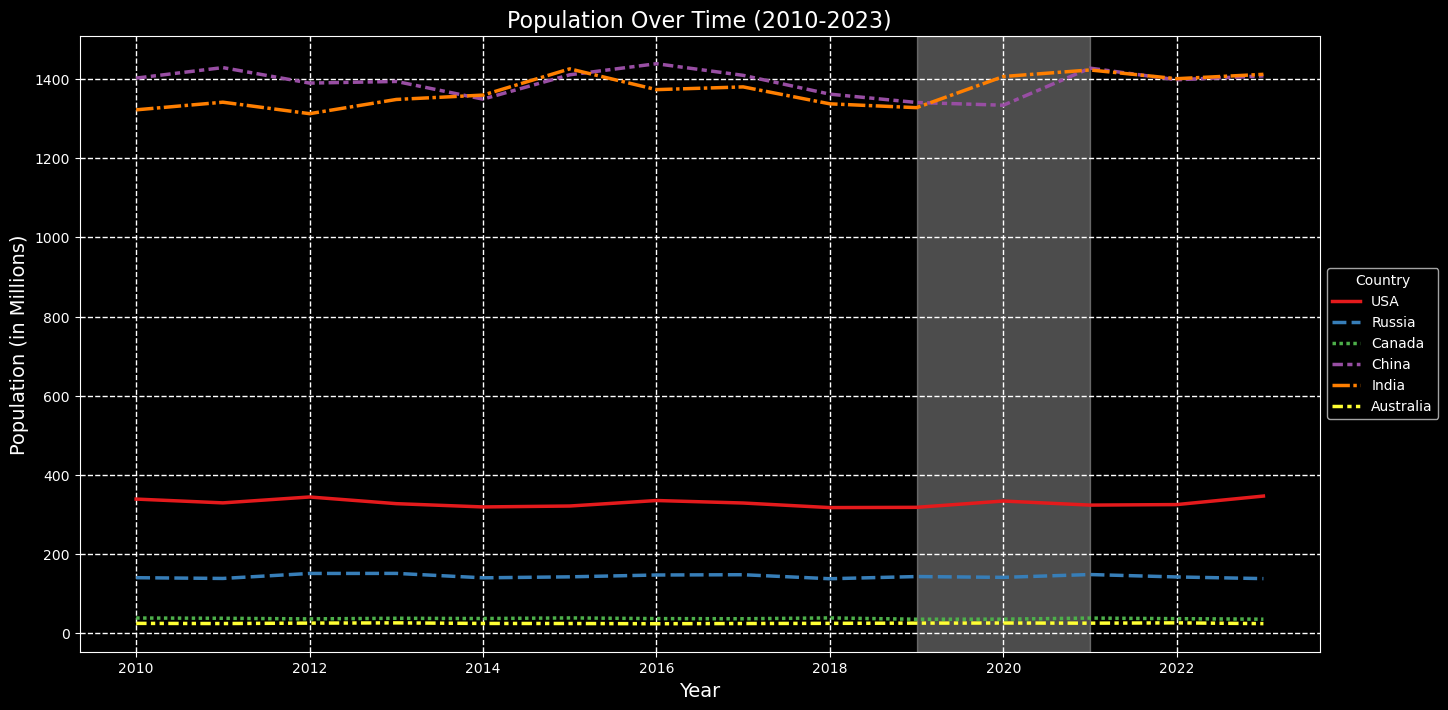

In [8]:
# Ensure the dataset is filtered correctly
filtered_df = countries_cleaned_df[(countries_cleaned_df['Year'] >= 2010) & (countries_cleaned_df['Year'] <= 2023)]

# Rename column for convenience if needed
filtered_df.rename(columns={'Population (in Millions)': 'Population'}, inplace=True)

# Set a dark background style
plt.style.use('dark_background')

# Set the figure size
plt.figure(figsize=(16, 8))

# Plot with enhanced settings
sns.lineplot(data=filtered_df, x='Year', y='Population', hue='Country', linewidth=2.5, style='Country', palette="Set1")

# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=1)

# Customize the legend and labels
plt.legend(title='Country', loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')
plt.title('Population Over Time (2010-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population (in Millions)', fontsize=14)

# Add shading for COVID-19 period (optional)
plt.axvspan(2019, 2021, color="white", alpha=0.3, label="COVID-19 Pandemic")

# Show the final chart
plt.show()


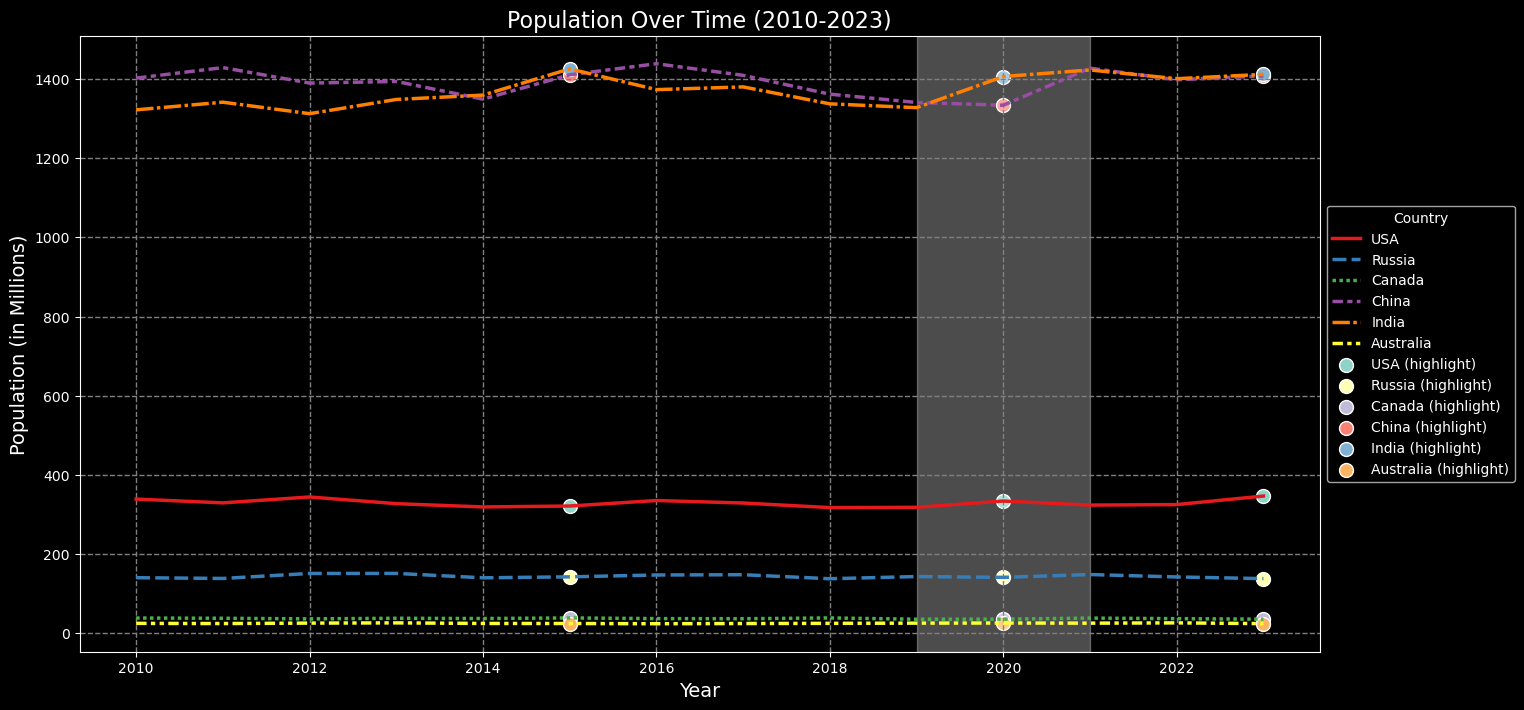

In [9]:
# Set a dark background style for the plot
plt.style.use('dark_background')

# Set up the figure
plt.figure(figsize=(16, 8))

# Plot the line chart
sns.lineplot(data=filtered_df, x='Year', y='Population', hue='Country', linewidth=2.5, style='Country', palette="Set1")

# Highlight points for specific years
highlight_years = [2015, 2020, 2023]  # Specify years to highlight

# Loop over each country to add scatter points
for country in filtered_df['Country'].unique():
    # Filter data for the specific country and years to highlight
    country_data = filtered_df[(filtered_df['Country'] == country) & (filtered_df['Year'].isin(highlight_years))]
    
    # Plot scatter points on the line for the highlighted years
    plt.scatter(
        country_data['Year'],
        country_data['Population'],
        label=f'{country} (highlight)',
        s=100,  # Size of the points
        marker='o',  # Marker shape
        edgecolor='white'  # Optional: White outline for better visibility
    )

# Add gridlines and customize the legend and labels
plt.grid(True, which='both', linestyle='--', linewidth=1, color="gray")
plt.legend(title='Country', loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')
plt.title('Population Over Time (2010-2023)', fontsize=16, color='white')
plt.xlabel('Year', fontsize=14, color='white')
plt.ylabel('Population (in Millions)', fontsize=14, color='white')

# Add shading for COVID-19 period (optional)
plt.axvspan(2019, 2021, color="white", alpha=0.3, label="COVID-19 Pandemic")

# Show the final chart
plt.show()


<Figure size 1400x800 with 0 Axes>

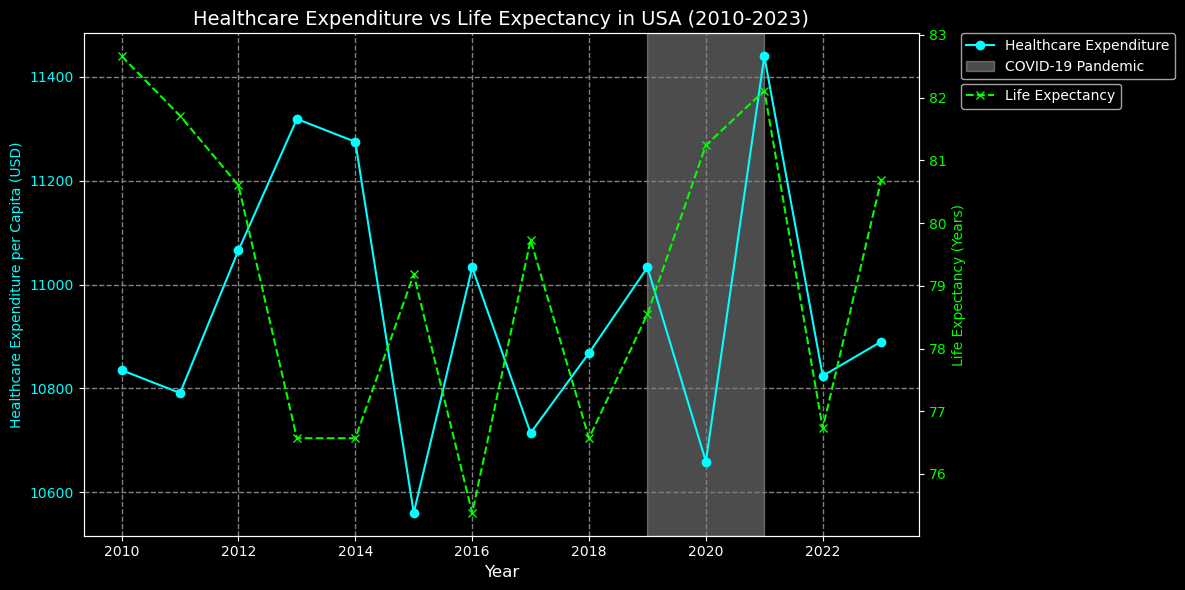

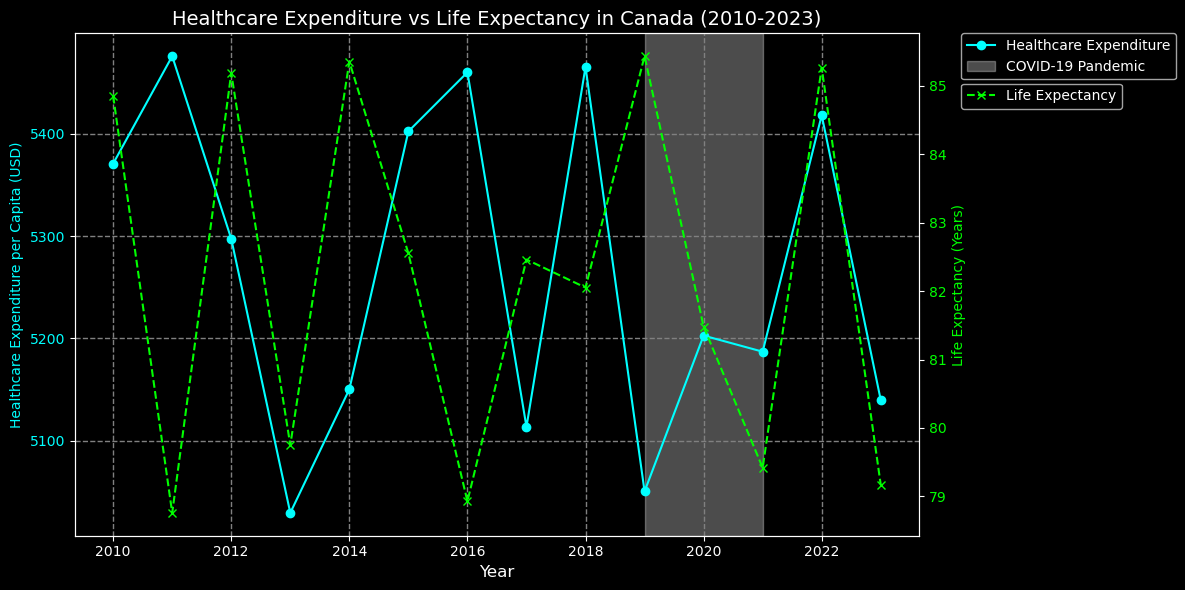

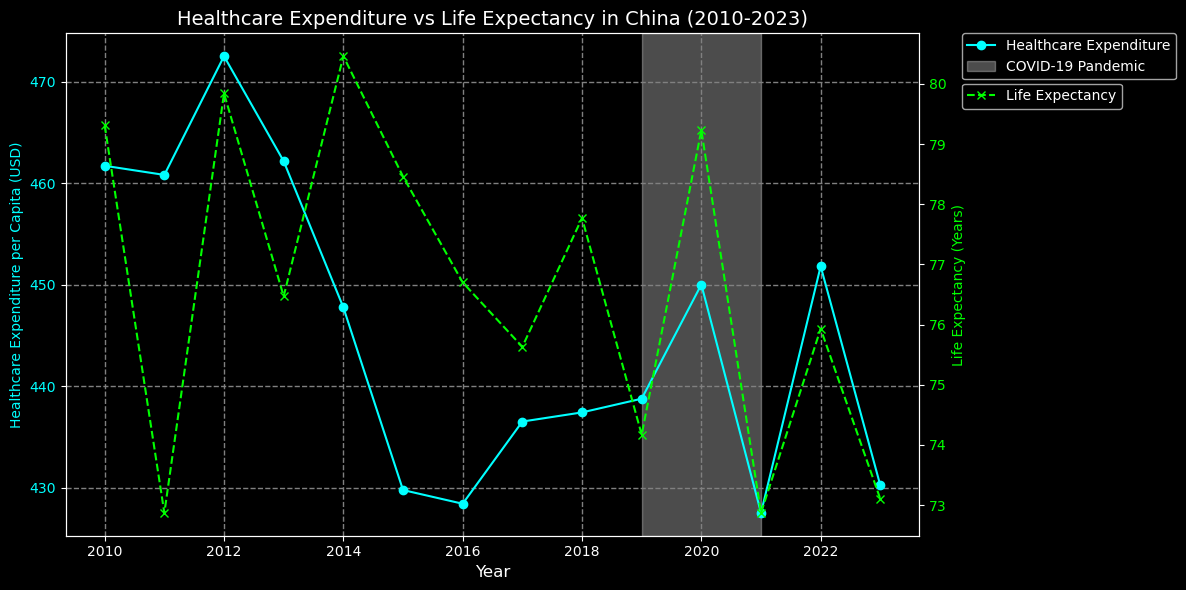

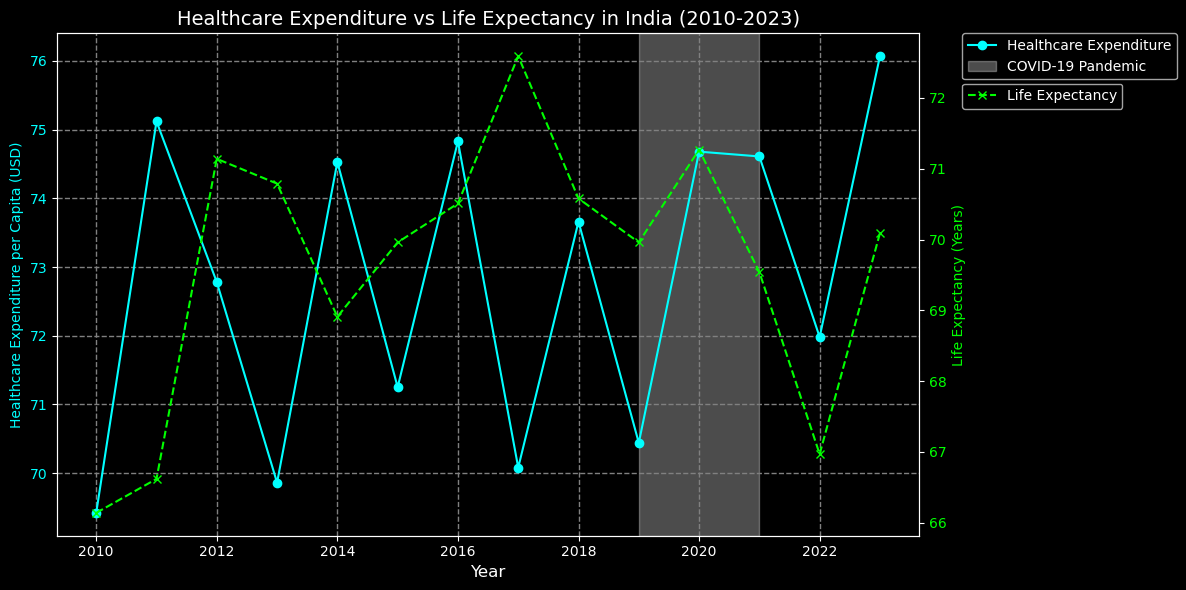

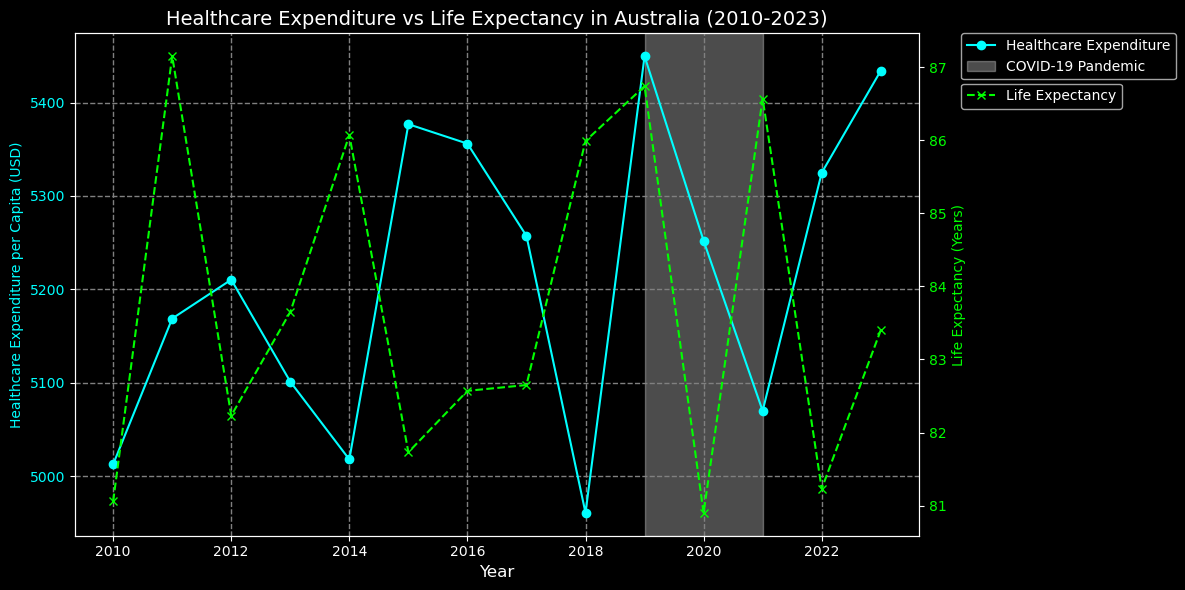

In [10]:
# Plot healthcare expenditure and life expectancy over time for selected countries
plt.figure(figsize=(14, 8))

# Plot healthcare expenditure and life expectancy over time for selected countries
selected_countries = ['USA', 'Canada', 'China', 'India', 'Australia']

for country in selected_countries:
    country_df = filtered_df[filtered_df['Country'] == country]
    
    # Create figure and axes
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Title and labels
    ax1.set_title(f'Healthcare Expenditure vs Life Expectancy in {country} (2010-2023)', fontsize=14, color='white')
    ax1.set_xlabel('Year', fontsize=12, color='white')
    
    # Primary y-axis for healthcare expenditure
    ax1.set_ylabel('Healthcare Expenditure per Capita (USD)', color='cyan')
    ax1.plot(country_df['Year'], country_df['Healthcare Expenditure per Capita (USD)'], 
             color='cyan', label='Healthcare Expenditure', marker='o', linestyle='-')
    ax1.tick_params(axis='y', labelcolor='cyan')
    
    # Add grid for better readability
    ax1.grid(True, which='both', linestyle='--', linewidth=1, color="gray")
    
    # Highlight COVID-19 period (optional)
    ax1.axvspan(2019, 2021, color="white", alpha=0.3, label="COVID-19 Pandemic")
    
    # Secondary y-axis for life expectancy
    ax2 = ax1.twinx()
    ax2.set_ylabel('Life Expectancy (Years)', color='lime')
    ax2.plot(country_df['Year'], country_df['Life Expectancy (Years)'], 
             color='lime', label='Life Expectancy', marker='x', linestyle='--')
    ax2.tick_params(axis='y', labelcolor='lime')
    
    # Legends for both lines, placed outside the plot area for clarity
    ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=10)
    ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 0.9), borderaxespad=0., fontsize=10)
    
    # Improve layout to prevent clipping of titles and labels
    fig.tight_layout()
    
    # Show the plot
    plt.show()

C:\Users\jdimi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\jdimi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\jdimi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\jdimi\AppData\Local\Temp\ipykernel_26392\3350675326.py:13: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=usa_data.index[-1] + pd.DateOffset(years=1), periods=5, freq='Y')


                                  SARIMAX Results                                  
Dep. Variable:     Life Expectancy (Years)   No. Observations:                   14
Model:                      ARIMA(1, 1, 1)   Log Likelihood                 -31.189
Date:                     Tue, 12 Nov 2024   AIC                             68.378
Time:                             19:09:44   BIC                             70.073
Sample:                         01-01-2010   HQIC                            68.030
                              - 01-01-2023                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2271      0.780     -0.291      0.771      -1.755       1.301
ma.L1         -0.3624      0.625     -0.580      0.562      -1.587       0.863
sigma2      

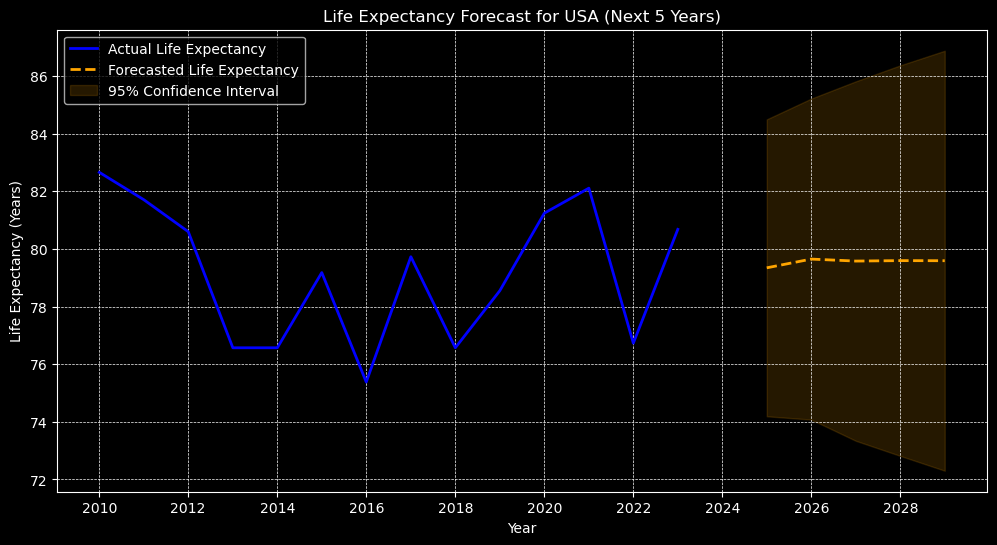

In [11]:
# Assuming usa_data is already filtered for 'USA' and set with 'Year' as the index
# Make sure the 'Year' column is converted to datetime if it's not already
usa_data = filtered_df[filtered_df['Country'] == 'USA'].set_index('Year')
usa_data.index = pd.to_datetime(usa_data.index, format='%Y')

# Fit the ARIMA model
model = ARIMA(usa_data['Life Expectancy (Years)'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Forecast for the next 5 years
forecast = model_fit.get_forecast(steps=5)
forecast_index = pd.date_range(start=usa_data.index[-1] + pd.DateOffset(years=1), periods=5, freq='Y')
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the actual data
plt.figure(figsize=(12, 6))
plt.plot(usa_data.index, usa_data['Life Expectancy (Years)'], label='Actual Life Expectancy', color='blue', linewidth=2)
plt.plot(forecast_index, forecast_values, label='Forecasted Life Expectancy', color='orange', linestyle='--', linewidth=2)

# Add confidence intervals with improved transparency
plt.fill_between(forecast_index, 
                 confidence_intervals.iloc[:, 0], 
                 confidence_intervals.iloc[:, 1], 
                 color='orange', alpha=0.15, label='95% Confidence Interval')

# Formatting the plot
plt.title('Life Expectancy Forecast for USA (Next 5 Years)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (Years)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

                               OLS Regression Results                              
Dep. Variable:     Life Expectancy (Years)   R-squared:                       0.433
Model:                                 OLS   Adj. R-squared:                  0.404
Method:                      Least Squares   F-statistic:                     15.06
Date:                     Tue, 12 Nov 2024   Prob (F-statistic):           3.41e-09
Time:                             19:09:44   Log-Likelihood:                -237.26
No. Observations:                       84   AIC:                             484.5
Df Residuals:                           79   BIC:                             496.7
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

C:\Users\jdimi\AppData\Local\Temp\ipykernel_26392\625126711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['COVID'] = filtered_df['Year'].apply(lambda x: 1 if x in [2020, 2021] else 0)
C:\Users\jdimi\AppData\Local\Temp\ipykernel_26392\625126711.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Predicted Life Expectancy'] = model.predict(X)


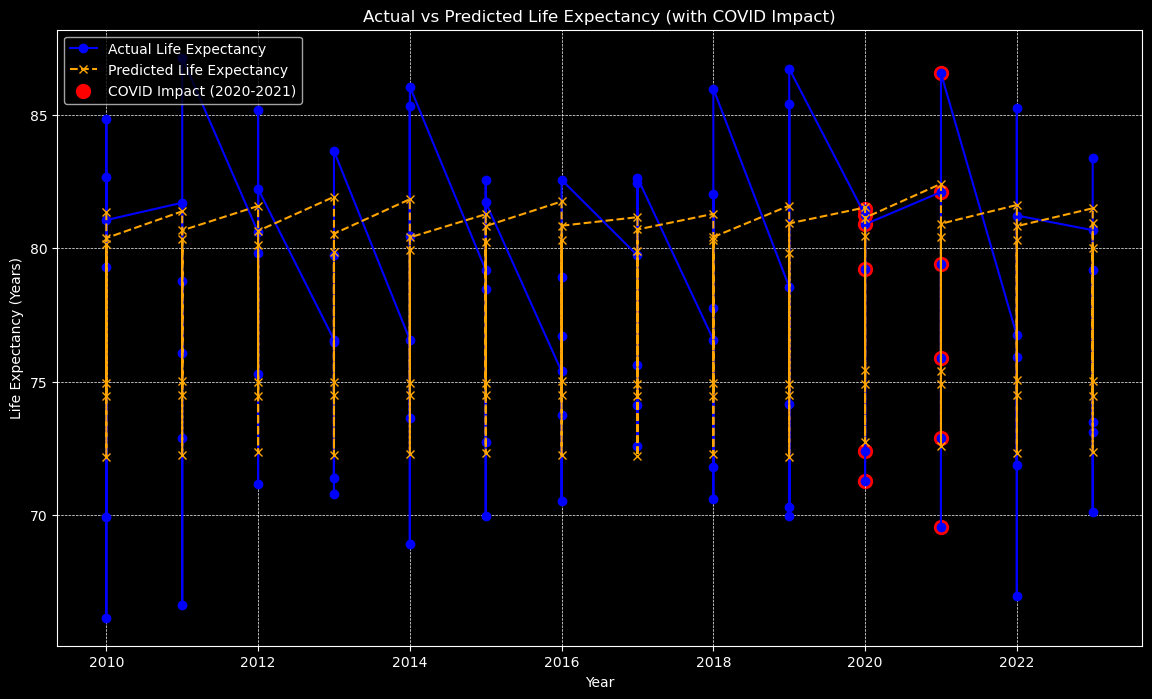

In [12]:
# Assuming filtered_df already exists with the 'COVID' column
# Add a COVID dummy variable (1 for 2020-2021, 0 otherwise)
filtered_df['COVID'] = filtered_df['Year'].apply(lambda x: 1 if x in [2020, 2021] else 0)

# Define independent variables
X = filtered_df[['Healthcare Expenditure per Capita (USD)', 'GDP (in Trillions USD)', 'Population Growth Rate (%)', 'COVID']]
y = filtered_df['Life Expectancy (Years)']

# Add constant
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

# Get predictions
filtered_df['Predicted Life Expectancy'] = model.predict(X)

# Plot actual vs. predicted life expectancy
plt.figure(figsize=(14, 8))

# Plot actual life expectancy values
plt.plot(filtered_df['Year'], filtered_df['Life Expectancy (Years)'], label='Actual Life Expectancy', color='blue', marker='o')

# Plot predicted life expectancy values
plt.plot(filtered_df['Year'], filtered_df['Predicted Life Expectancy'], label='Predicted Life Expectancy', color='orange', linestyle='--', marker='x')

# Highlight COVID years (2020 and 2021) in red
covid_years = filtered_df[filtered_df['COVID'] == 1]
plt.scatter(covid_years['Year'], covid_years['Life Expectancy (Years)'], color='red', label='COVID Impact (2020-2021)', s=100)

# Formatting the plot
plt.title('Actual vs Predicted Life Expectancy (with COVID Impact)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (Years)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

In [13]:
# Add a COVID dummy variable (1 for 2020-2021, 0 otherwise)
filtered_df['COVID'] = filtered_df['Year'].apply(lambda x: 1 if x in [2020, 2021] else 0)

# Split data into pre-COVID and COVID periods
pre_covid_df = filtered_df[filtered_df['COVID'] == 0]
covid_df = filtered_df[filtered_df['COVID'] == 1]

# Select variables of interest for correlation
variables_of_interest = ['GDP (in Trillions USD)', 'Unemployment Rate (%)', 
                         'Healthcare Expenditure per Capita (USD)', 'Population Growth Rate (%)']

# Calculate Pearson Correlation pre-COVID
print("Pearson Correlation Pre-COVID")
pearson_pre_covid = pre_covid_df[variables_of_interest].corr(method='pearson')
print(pearson_pre_covid)

# Calculate Pearson Correlation during COVID
print("\nPearson Correlation During COVID")
pearson_covid = covid_df[variables_of_interest].corr(method='pearson')
print(pearson_covid)

# Calculate Spearman Correlation pre-COVID
print("\nSpearman Correlation Pre-COVID")
spearman_pre_covid = pre_covid_df[variables_of_interest].corr(method='spearman')
print(spearman_pre_covid)

# Calculate Spearman Correlation during COVID
print("\nSpearman Correlation During COVID")
spearman_covid = covid_df[variables_of_interest].corr(method='spearman')
print(spearman_covid)

Pearson Correlation Pre-COVID
                                         GDP (in Trillions USD)  \
GDP (in Trillions USD)                                 1.000000   
Unemployment Rate (%)                                 -0.649762   
Healthcare Expenditure per Capita (USD)                0.521902   
Population Growth Rate (%)                            -0.350178   

                                         Unemployment Rate (%)  \
GDP (in Trillions USD)                               -0.649762   
Unemployment Rate (%)                                 1.000000   
Healthcare Expenditure per Capita (USD)              -0.391028   
Population Growth Rate (%)                            0.513926   

                                         Healthcare Expenditure per Capita (USD)  \
GDP (in Trillions USD)                                                  0.521902   
Unemployment Rate (%)                                                  -0.391028   
Healthcare Expenditure per Capita (USD)            

C:\Users\jdimi\AppData\Local\Temp\ipykernel_26392\2118541645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['COVID'] = filtered_df['Year'].apply(lambda x: 1 if x in [2020, 2021] else 0)


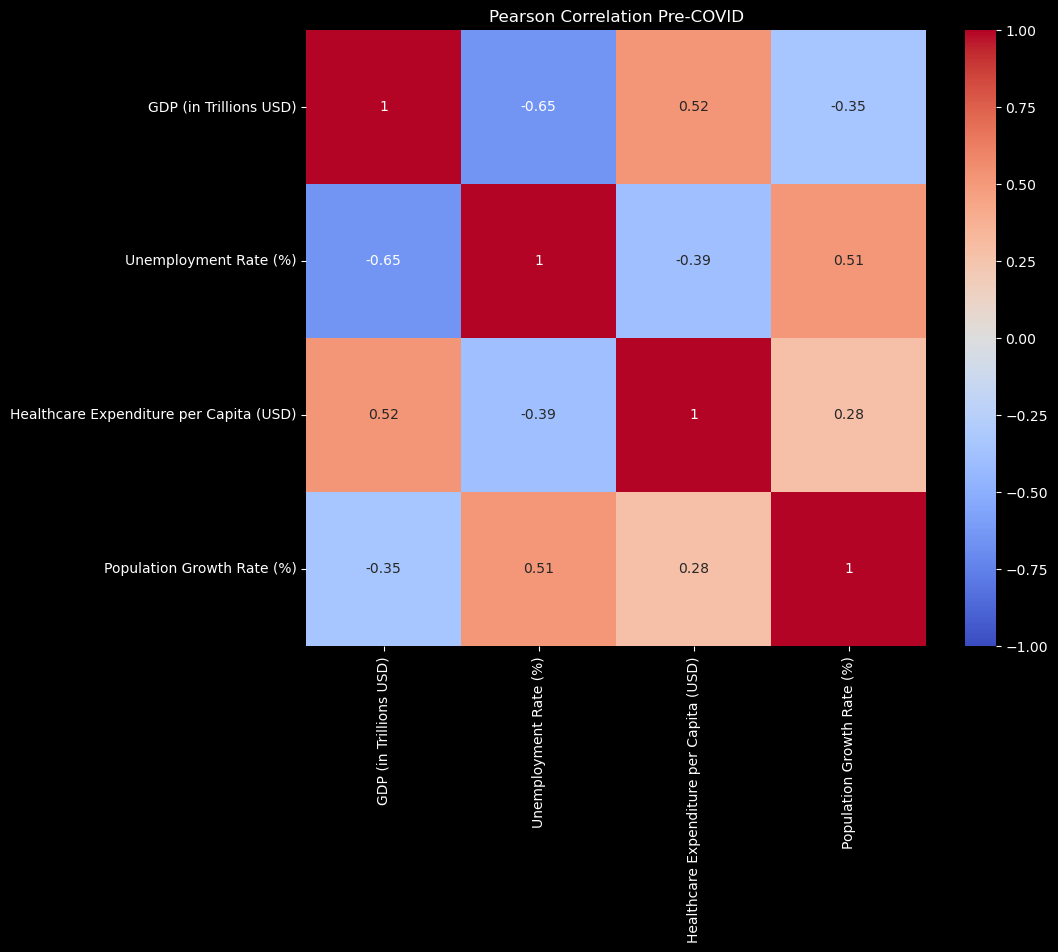

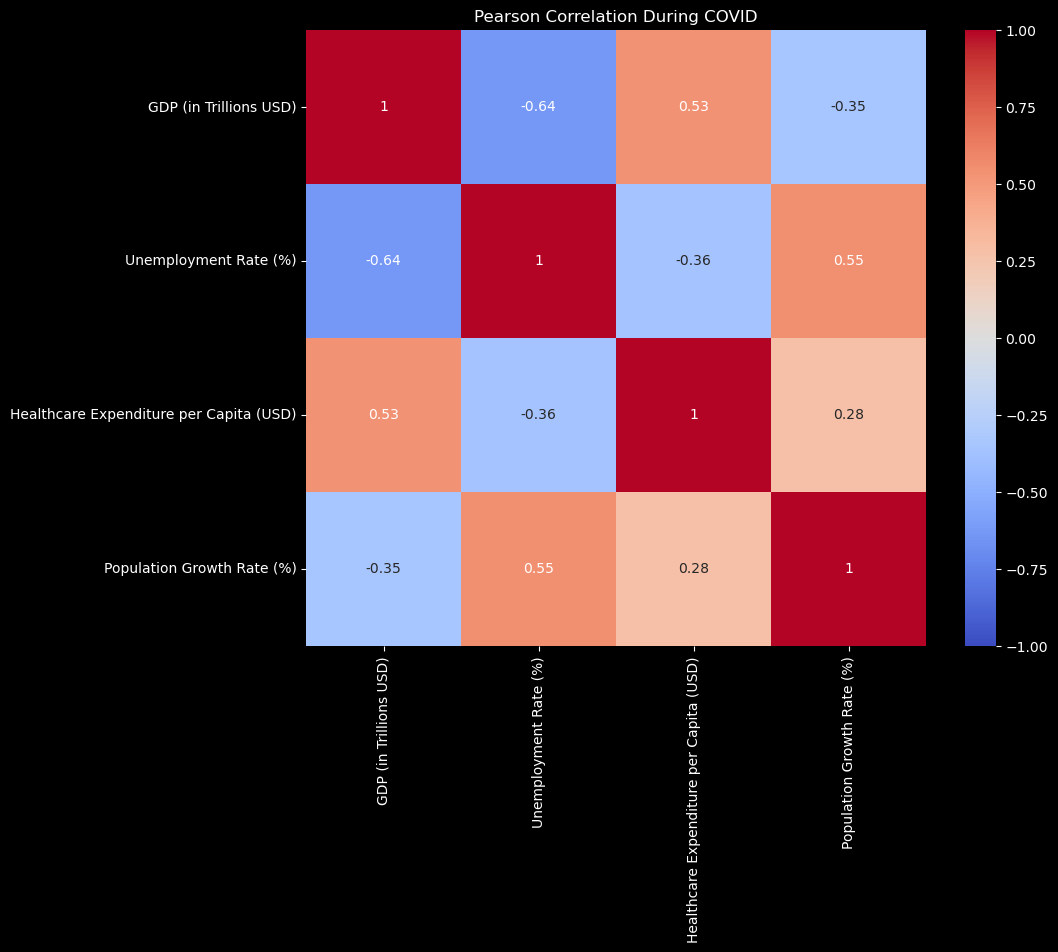

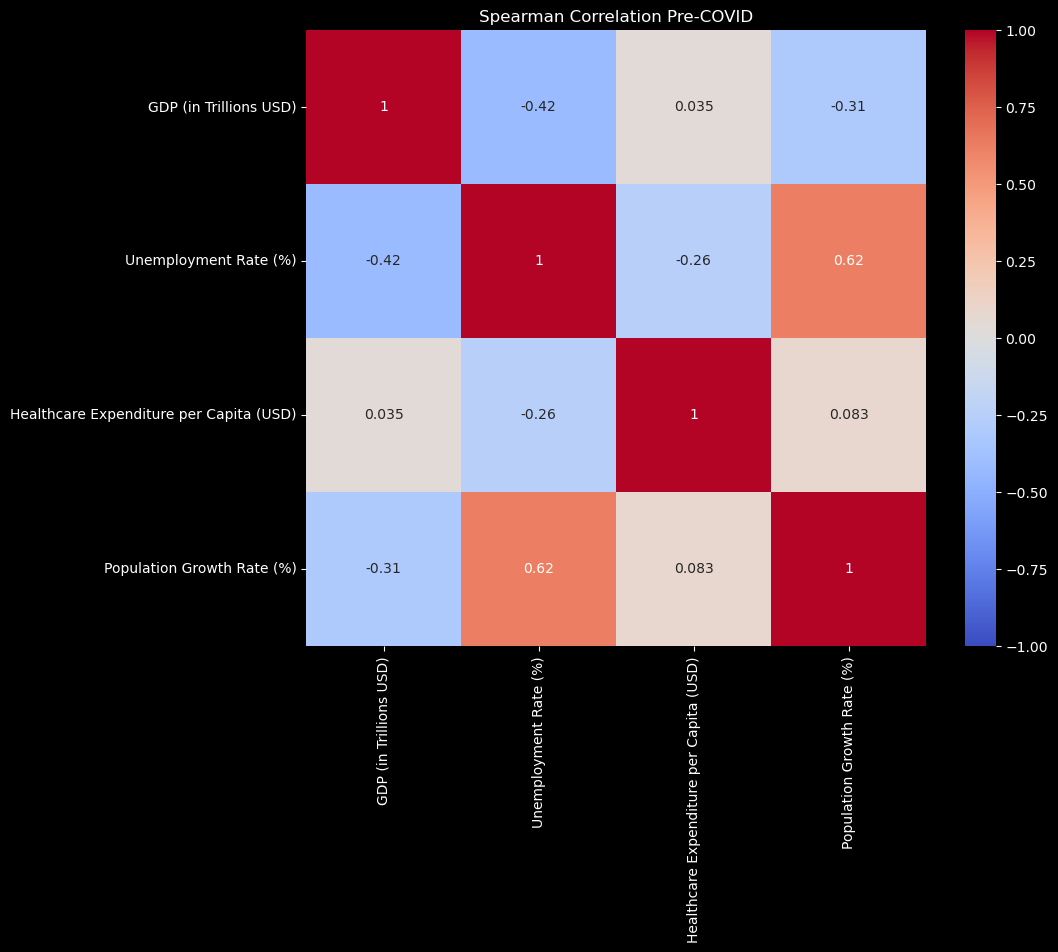

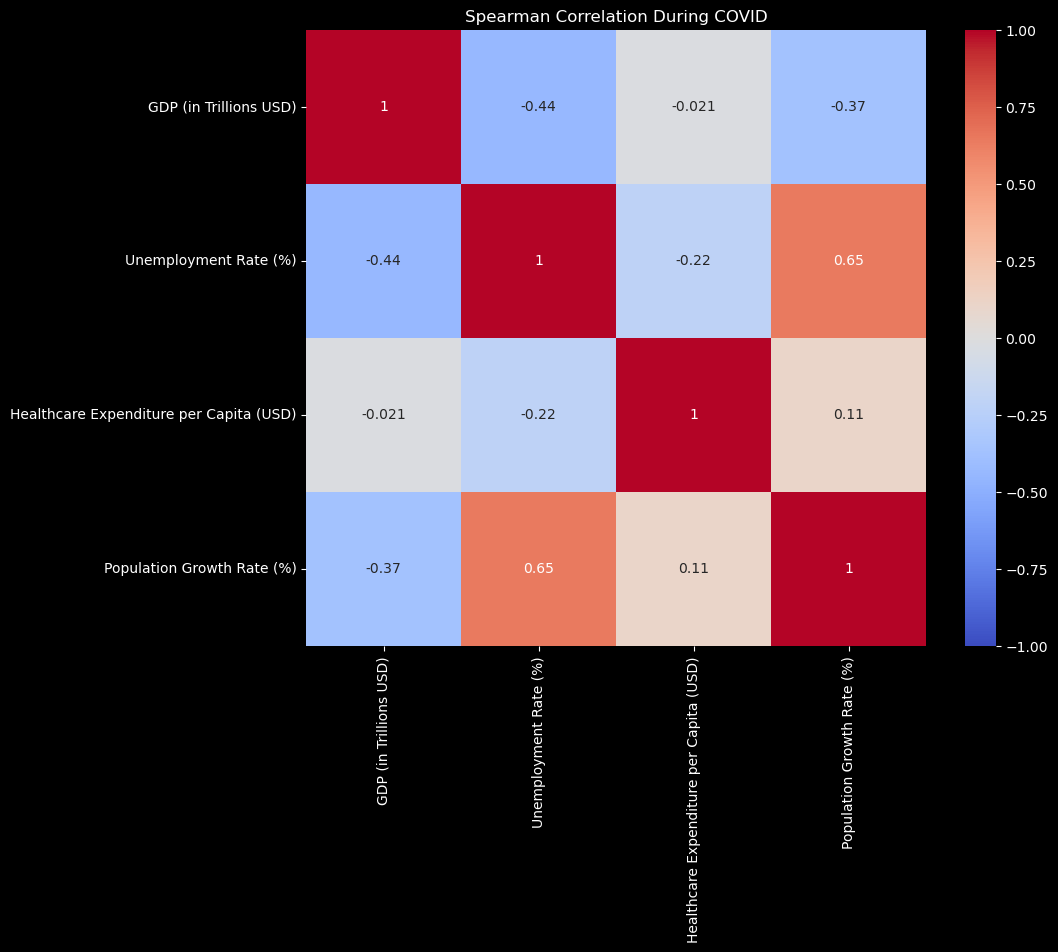

In [14]:
# Function to plot a heatmap of correlations
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

# Plot heatmaps for Pearson and Spearman correlations
plot_heatmap(pearson_pre_covid, 'Pearson Correlation Pre-COVID')
plot_heatmap(pearson_covid, 'Pearson Correlation During COVID')
plot_heatmap(spearman_pre_covid, 'Spearman Correlation Pre-COVID')
plot_heatmap(spearman_covid, 'Spearman Correlation During COVID')

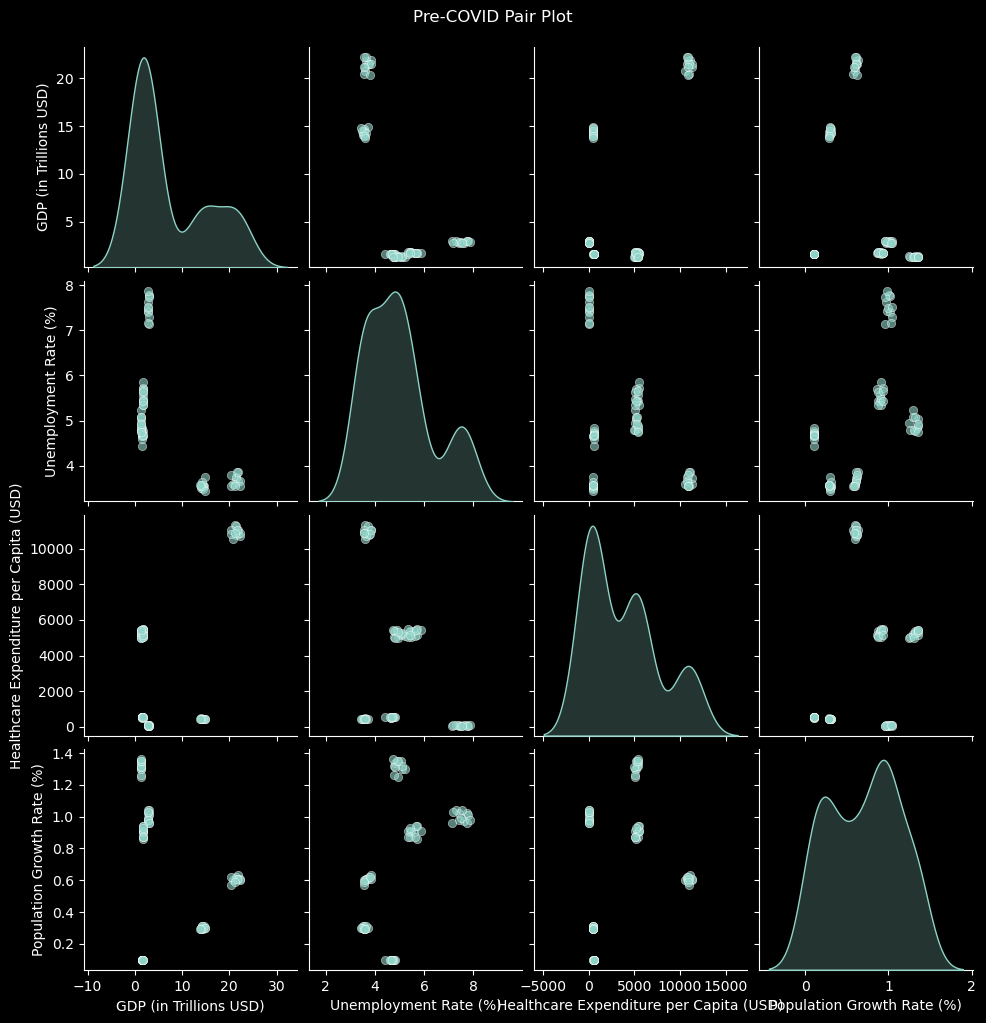

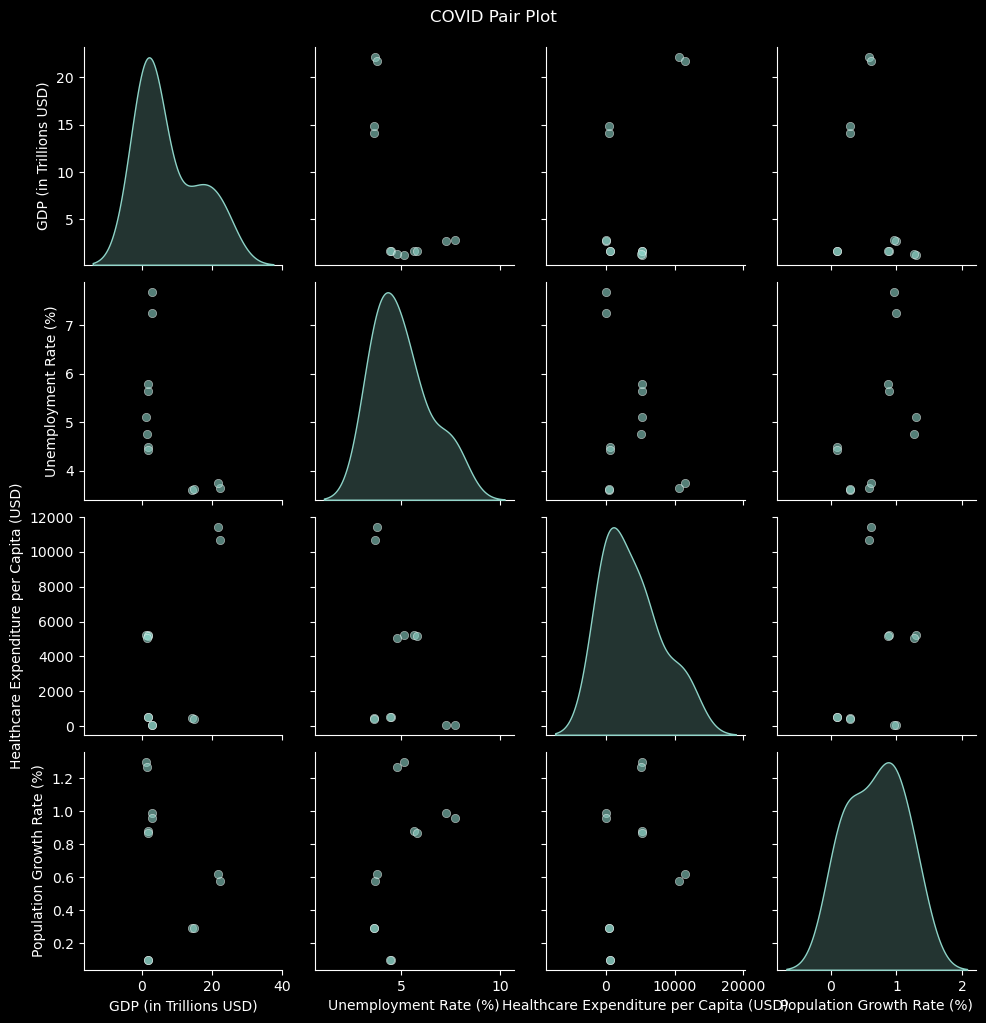

In [15]:
# Plot pair plots for pre-COVID and during-COVID data
sns.pairplot(pre_covid_df[variables_of_interest], diag_kind="kde", plot_kws={'alpha':0.6})
plt.suptitle("Pre-COVID Pair Plot", y=1.02)

sns.pairplot(covid_df[variables_of_interest], diag_kind="kde", plot_kws={'alpha':0.6})
plt.suptitle("COVID Pair Plot", y=1.02)
plt.show()

In [32]:
print(filtered_df.columns)


Index(['Country', 'Year', 'GDP (in Trillions USD)', 'GDP per Capita (in USD)',
       'Inflation Rate (%)', 'Population', 'Population Growth Rate (%)',
       'Life Expectancy (Years)', 'Healthcare Expenditure per Capita (USD)',
       'Doctor-to-Patient Ratio', 'Unemployment Rate (%)',
       'Labor Force Participation Rate (%)', 'Crime Rate (per 100,000)',
       'Mean Healthcare Expenditure Before 2020',
       'Mean Healthcare Expenditure After 2020', 'COVID',
       'Predicted Life Expectancy'],
      dtype='object')


C:\Users\jdimi\AppData\Local\Temp\ipykernel_26392\2181305844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Period'] = filtered_df['Year'].apply(lambda x: 'During COVID' if x in [2020, 2021] else 'Pre-COVID')


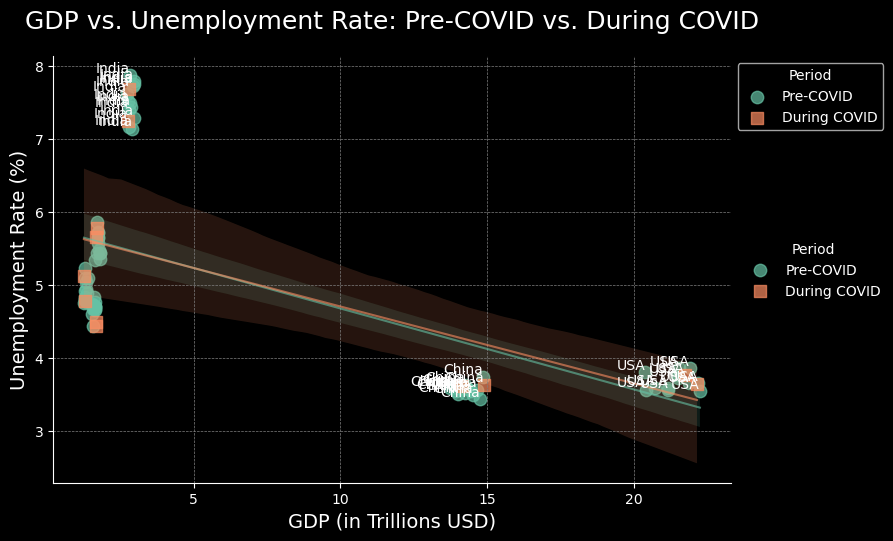

In [34]:
# Add a Period column to classify the data as Pre-COVID or During COVID
filtered_df['Period'] = filtered_df['Year'].apply(lambda x: 'During COVID' if x in [2020, 2021] else 'Pre-COVID')

# Set the dark background style for better contrast
plt.style.use('dark_background')

# Plot with enhanced settings
scatter_plot = sns.lmplot(data=filtered_df, x='GDP (in Trillions USD)', y='Unemployment Rate (%)', 
                          hue='Period', aspect=1.5, markers=['o', 's'], palette="Set2",
                          scatter_kws={'s': 80, 'alpha': 0.7}, line_kws={'lw': 1.5, 'alpha': 0.6})

# Title and labels with increased font size
plt.title("GDP vs. Unemployment Rate: Pre-COVID vs. During COVID", fontsize=18, pad=20)
plt.xlabel("GDP (in Trillions USD)", fontsize=14)
plt.ylabel("Unemployment Rate (%)", fontsize=14)

# Adjust legend and move it outside the plot
plt.legend(title='Period', loc='upper left', bbox_to_anchor=(1, 1), fontsize='medium')

# Add grid lines for readability
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)

# Optional annotations with limited countries for clarity
for i, row in filtered_df.iterrows():
    if row['Country'] in ['USA', 'China', 'India']:  # Focused annotations for main countries
        plt.text(row['GDP (in Trillions USD)'], row['Unemployment Rate (%)'], row['Country'],
                 fontsize=10, color='white', ha='right', va='bottom')

plt.show()


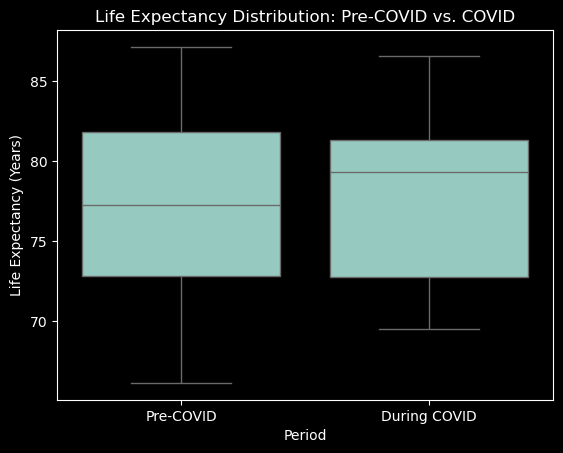

In [36]:
sns.boxplot(data=filtered_df, x='Period', y='Life Expectancy (Years)')
plt.title("Life Expectancy Distribution: Pre-COVID vs. COVID")
plt.show()


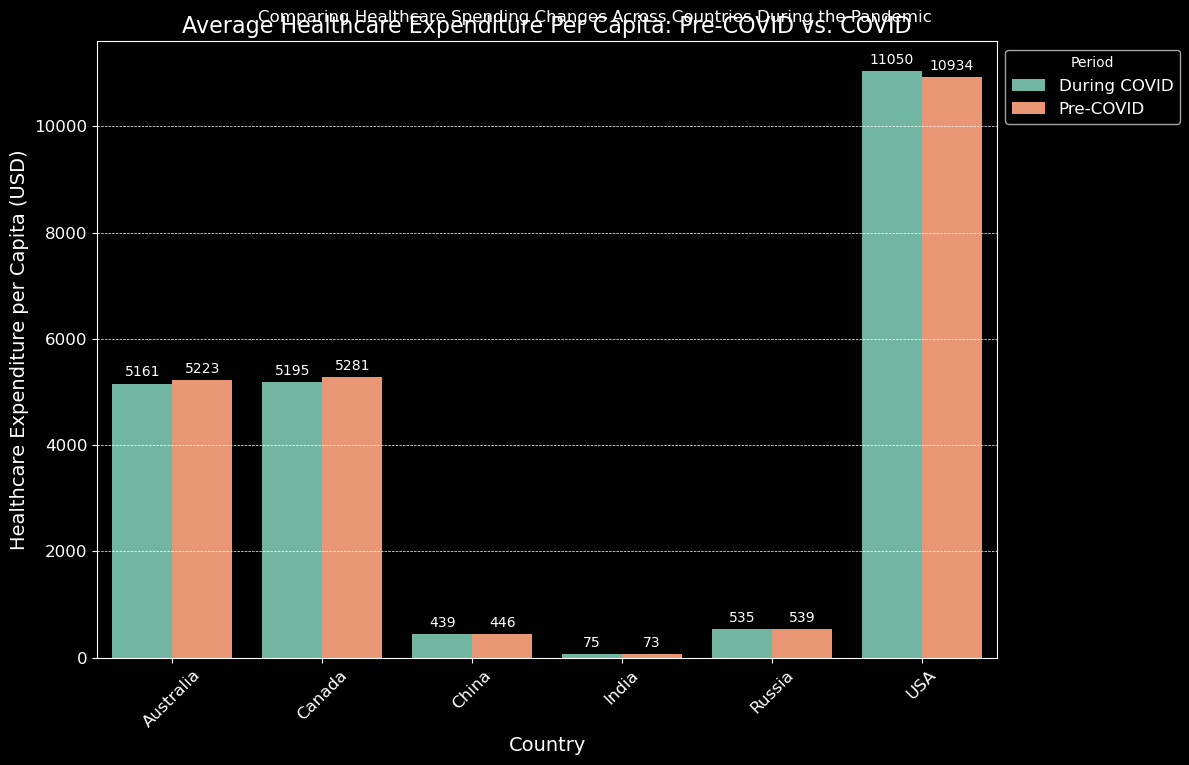

In [40]:
# Calculate average healthcare expenditure per capita by period and country
avg_health_exp = filtered_df.groupby(['Country', 'Period'])['Healthcare Expenditure per Capita (USD)'].mean().reset_index()

plt.figure(figsize=(12, 8))

# Enhanced barplot with customizations
ax = sns.barplot(data=avg_health_exp, x='Country', y='Healthcare Expenditure per Capita (USD)', 
                 hue='Period', palette='Set2')

# Add labels to each bar for clarity
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3)

# Title and subtitles
plt.title("Average Healthcare Expenditure Per Capita: Pre-COVID vs. COVID", fontsize=16)
plt.suptitle("Comparing Healthcare Spending Changes Across Countries During the Pandemic", fontsize=12, y=0.95)

# Labels and legend
plt.xlabel("Country", fontsize=14)
plt.ylabel("Healthcare Expenditure per Capita (USD)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Period', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Add grid lines for readability
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()


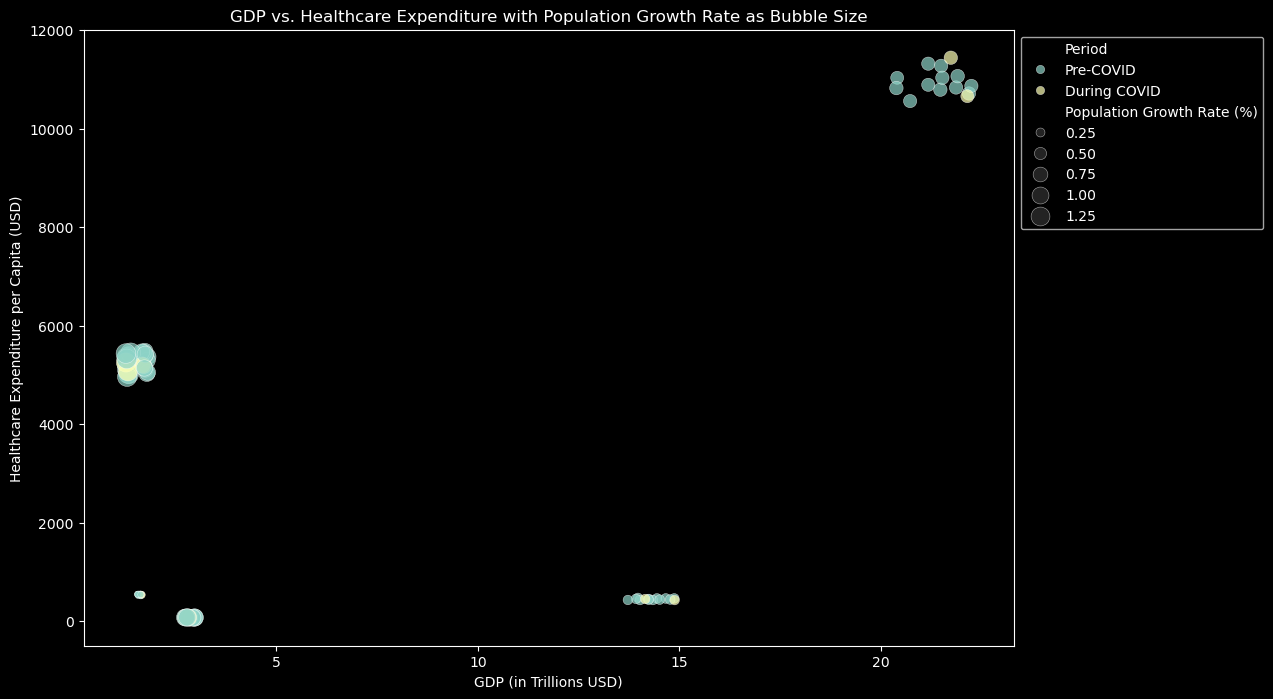

In [42]:
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(data=filtered_df, x='GDP (in Trillions USD)', y='Healthcare Expenditure per Capita (USD)', 
                              size='Population Growth Rate (%)', hue='Period', alpha=0.7, sizes=(20, 200))
plt.title("GDP vs. Healthcare Expenditure with Population Growth Rate as Bubble Size")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [44]:
# Assuming `filtered_df` is the main DataFrame with data from 2000-2023
# Filter the dataset into pre-COVID and COVID-era periods
pre_covid_df = filtered_df[(filtered_df['Year'] >= 2000) & (filtered_df['Year'] <= 2019)]
covid_era_df = filtered_df[(filtered_df['Year'] >= 2020) & (filtered_df['Year'] <= 2021)]

# Define key indicators for analysis
key_indicators = ['GDP (in Trillions USD)', 'Healthcare Expenditure per Capita (USD)', 
                  'Life Expectancy (Years)', 'Unemployment Rate (%)']

# Calculate descriptive statistics for pre-COVID period
pre_covid_stats = pre_covid_df[key_indicators].describe(percentiles=[0.25, 0.5, 0.75])
pre_covid_stats = pre_covid_stats.rename(columns=lambda x: f"{x} (Pre-COVID)")

# Calculate descriptive statistics for COVID-era period
covid_era_stats = covid_era_df[key_indicators].describe(percentiles=[0.25, 0.5, 0.75])
covid_era_stats = covid_era_stats.rename(columns=lambda x: f"{x} (COVID)")

# Combine statistics for comparison
descriptive_stats = pd.concat([pre_covid_stats, covid_era_stats], axis=1)

# Display the comparison table
print("Descriptive Statistics Comparison (Pre-COVID vs COVID):")
print(descriptive_stats)


Descriptive Statistics Comparison (Pre-COVID vs COVID):
       GDP (in Trillions USD) (Pre-COVID)  \
count                           60.000000   
mean                             7.246833   
std                              7.925717   
min                              1.290000   
25%                              1.627500   
50%                              2.275000   
75%                             14.365000   
max                             22.240000   

       Healthcare Expenditure per Capita (USD) (Pre-COVID)  \
count                                          60.000000     
mean                                         3746.606000     
std                                          3929.705676     
min                                            69.420000     
25%                                           445.500000     
50%                                          2755.500000     
75%                                          5383.162500     
max                                       

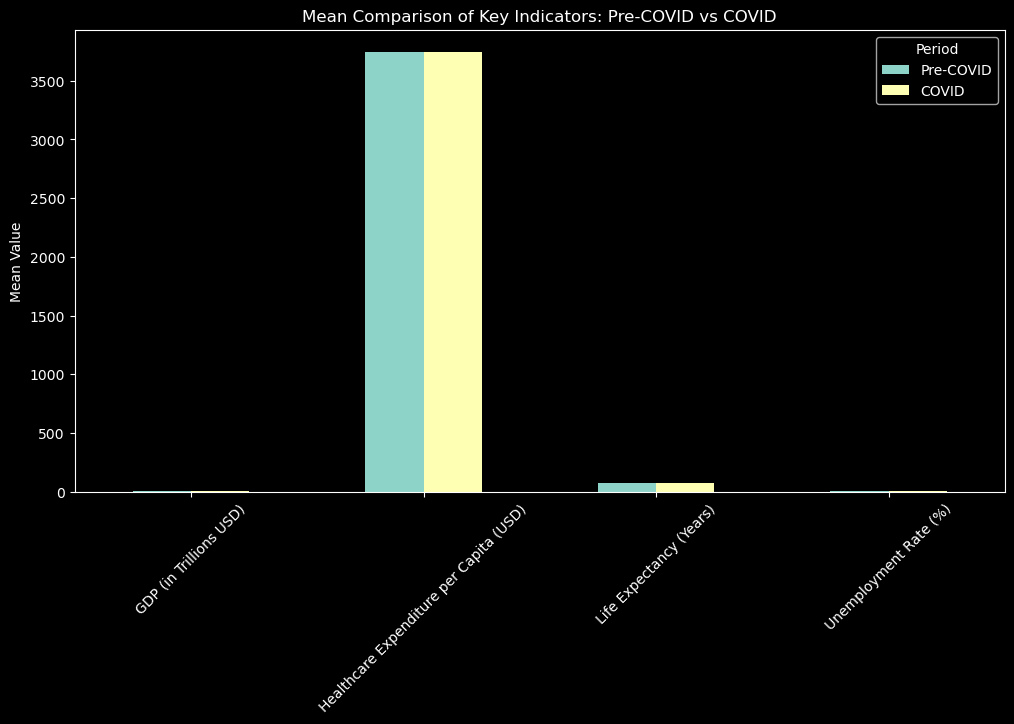

In [46]:
# Plot mean comparison for each indicator across periods
mean_comparison = pd.DataFrame({
    'Pre-COVID': pre_covid_df[key_indicators].mean(),
    'COVID': covid_era_df[key_indicators].mean()
})

mean_comparison.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Comparison of Key Indicators: Pre-COVID vs COVID')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.show()


In [48]:
# Summary of key descriptive statistics for Pre-COVID and COVID periods
key_indicators = ['GDP (in Trillions USD)', 'Healthcare Expenditure per Capita (USD)', 
                  'Life Expectancy (Years)', 'Unemployment Rate (%)']

# Calculate means for each period and concatenate
pre_covid_stats = pre_covid_df[key_indicators].describe().loc[['mean', 'std', 'min', 'max']]
covid_stats = covid_df[key_indicators].describe().loc[['mean', 'std', 'min', 'max']]

# Combine and display in a single table
summary_stats = pd.concat([pre_covid_stats.add_suffix(' (Pre-COVID)'), covid_stats.add_suffix(' (COVID)')], axis=1)
print(summary_stats)


      GDP (in Trillions USD) (Pre-COVID)  \
mean                            7.246833   
std                             7.925717   
min                             1.290000   
max                            22.240000   

      Healthcare Expenditure per Capita (USD) (Pre-COVID)  \
mean                                        3746.606000     
std                                         3929.705676     
min                                           69.420000     
max                                        11319.000000     

      Life Expectancy (Years) (Pre-COVID)  Unemployment Rate (%) (Pre-COVID)  \
mean                            77.508833                           4.994833   
std                              5.525255                           1.357984   
min                             66.140000                           3.430000   
max                             87.150000                           7.870000   

      GDP (in Trillions USD) (COVID)  \
mean                        7.31

<Figure size 1200x600 with 0 Axes>

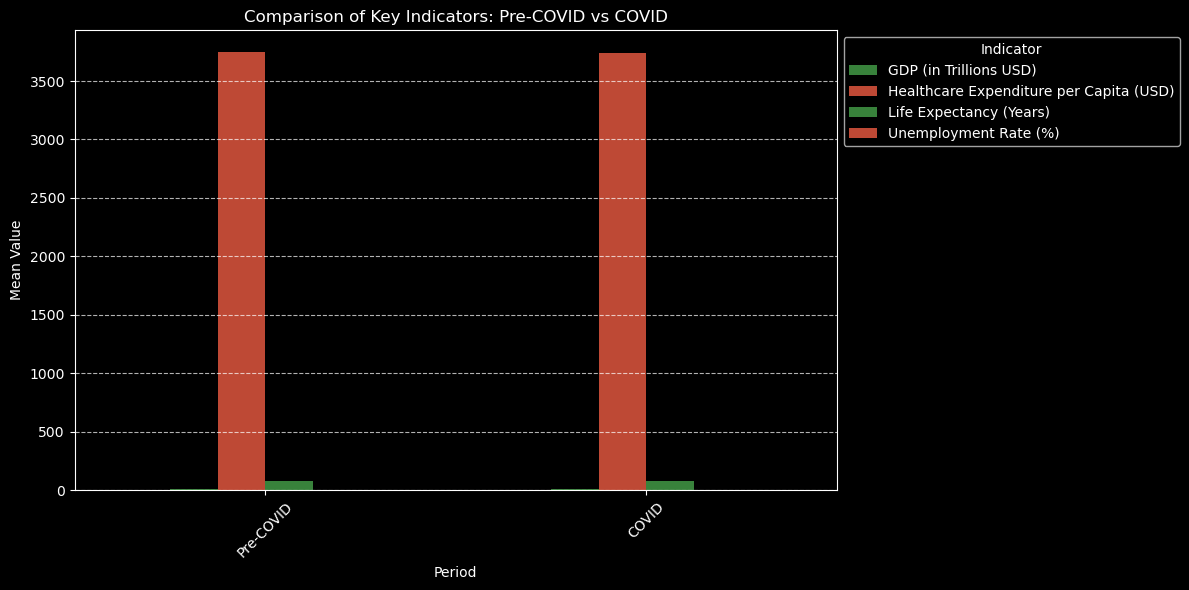

In [50]:
# Prepare data for visualization
mean_comparison = pd.DataFrame({
    'Pre-COVID': pre_covid_df[key_indicators].mean(),
    'COVID': covid_df[key_indicators].mean()
}).T

# Plot the means for Pre-COVID vs COVID for each indicator
plt.figure(figsize=(12, 6))
mean_comparison.plot(kind='bar', color=['#4CAF50', '#FF6347'], alpha=0.75, figsize=(12, 6))
plt.title('Comparison of Key Indicators: Pre-COVID vs COVID')
plt.xlabel('Period')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Indicator', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

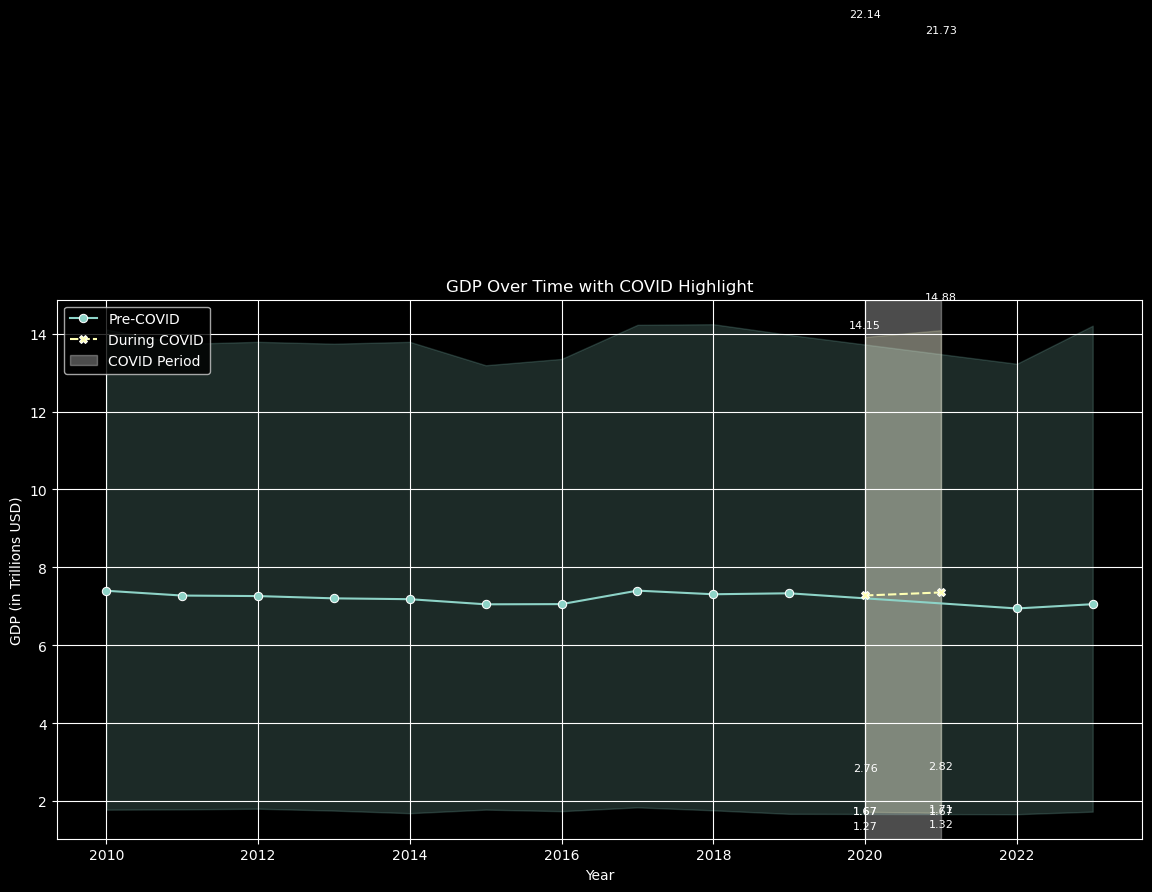

In [52]:
# Set the plot size and style
plt.figure(figsize=(14, 7))

# Create the line plot with markers for GDP over time
sns.lineplot(data=filtered_df, x='Year', y='GDP (in Trillions USD)', hue='Period', style='Period', markers=True)

# Highlight the COVID period
plt.axvspan(2020, 2021, color='white', alpha=0.3, label='COVID Period')

# Title, labels, and grid
plt.title('GDP Over Time with COVID Highlight')
plt.xlabel('Year')
plt.ylabel('GDP (in Trillions USD)')
plt.legend(loc='upper left')
plt.grid(True)

# Annotate significant points (2020 and 2021)
for index, row in filtered_df[(filtered_df['Year'] == 2020) | (filtered_df['Year'] == 2021)].iterrows():
    plt.text(row['Year'], row['GDP (in Trillions USD)'], 
             f"{row['GDP (in Trillions USD)']:.2f}", 
             color='white', fontsize=8, ha='center')

# Display the plot
plt.show()

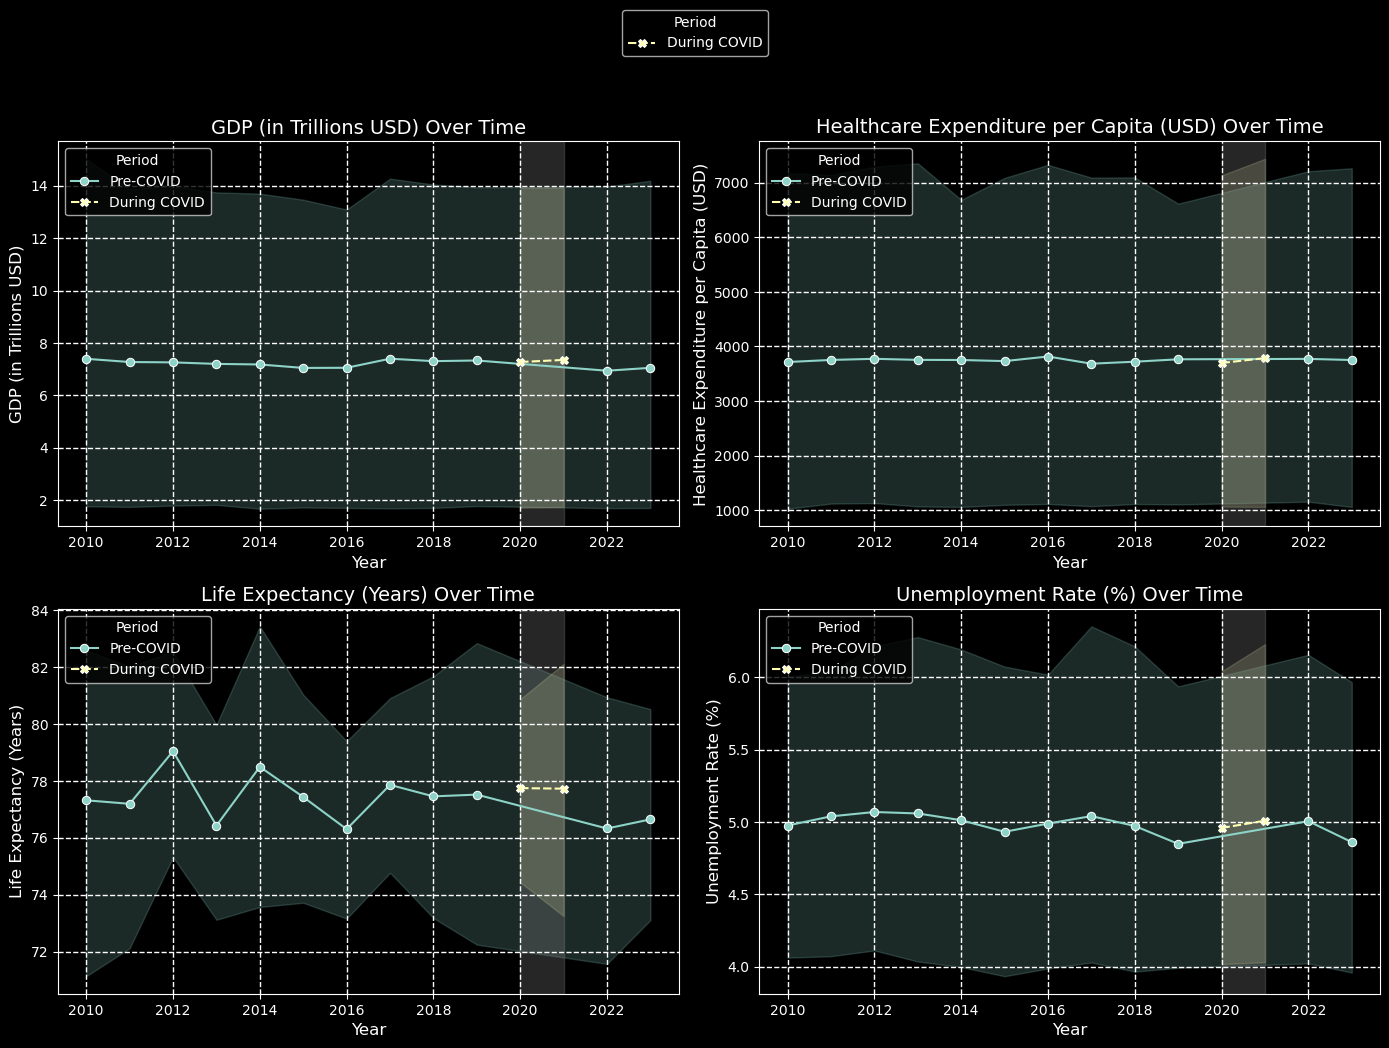

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
indicators = ['GDP (in Trillions USD)', 'Healthcare Expenditure per Capita (USD)', 
              'Life Expectancy (Years)', 'Unemployment Rate (%)']

# Loop through each indicator and set up the subplot
for i, indicator in enumerate(indicators):
    sns.lineplot(data=filtered_df, x='Year', y=indicator, hue='Period', ax=axes[i // 2, i % 2], 
                 style='Period', markers=True)
    
    # Add COVID period shading only once, without redundant labels
    axes[i // 2, i % 2].axvspan(2020, 2021, color='grey', alpha=0.3)
    
    # Set individual title, and adjust y-axis limits if necessary
    axes[i // 2, i % 2].set_title(f'{indicator} Over Time', fontsize=14)
    axes[i // 2, i % 2].set_ylabel(indicator, fontsize=12)
    axes[i // 2, i % 2].set_xlabel("Year", fontsize=12)
    
    # Improve readability with a grid and fine-tuned y-axis range if required
    axes[i // 2, i % 2].grid(True, linestyle='--', linewidth=1)
    
# Add a single shared legend outside the plots
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles=handles[1:], labels=labels[1:], loc='upper center', 
           bbox_to_anchor=(0.5, 1.05), ncol=4, title="Period", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for legend
plt.show()


C:\Users\jdimi\AppData\Local\Temp\ipykernel_26392\3152728541.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Period', y=indicator, palette={"Pre-COVID": "skyblue", "During COVID": "salmon"})
C:\Users\jdimi\AppData\Local\Temp\ipykernel_26392\3152728541.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='Period', y=indicator, palette={"Pre-COVID": "skyblue", "During COVID": "salmon"})
C:\Users\jdimi\AppData\Local\Temp\ipykernel_26392\3152728541.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(da

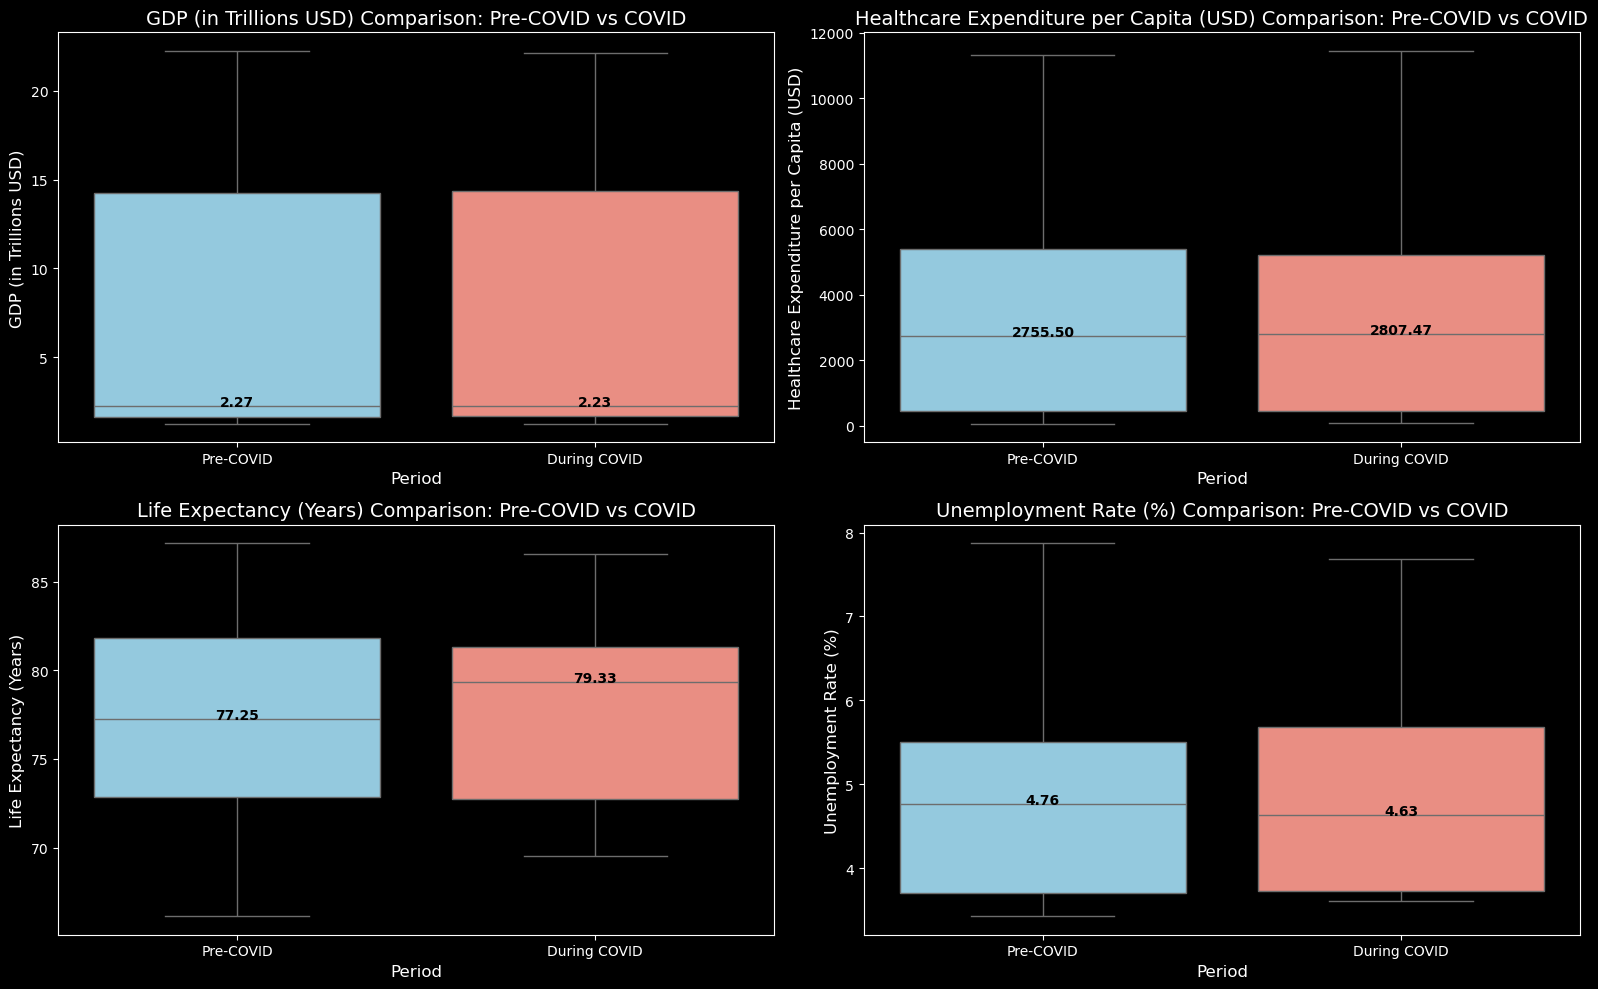

In [56]:
plt.figure(figsize=(16, 10))
indicators = ['GDP (in Trillions USD)', 'Healthcare Expenditure per Capita (USD)', 
              'Life Expectancy (Years)', 'Unemployment Rate (%)']

# Loop through each indicator and create a boxplot with enhancements
for i, indicator in enumerate(indicators):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=filtered_df, x='Period', y=indicator, palette={"Pre-COVID": "skyblue", "During COVID": "salmon"})
    
    # Title and labels with improved font size and units
    plt.title(f'{indicator} Comparison: Pre-COVID vs COVID', fontsize=14)
    plt.xlabel('Period', fontsize=12)
    plt.ylabel(indicator, fontsize=12)

    # Annotate median values for additional clarity
    medians = filtered_df.groupby(['Period'])[indicator].median()
    for tick, label in zip(plt.gca().get_xticks(), plt.gca().get_xticklabels()):
        plt.text(tick, medians[label.get_text()], f'{medians[label.get_text()]:.2f}', 
                 horizontalalignment='center', color='black', weight='semibold')

plt.tight_layout()
plt.show()


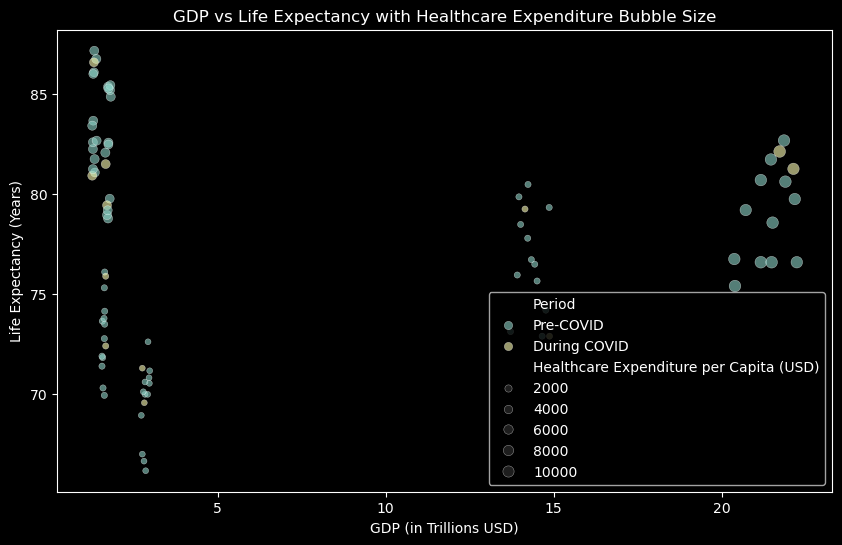

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='GDP (in Trillions USD)', y='Life Expectancy (Years)', 
                size='Healthcare Expenditure per Capita (USD)', hue='Period', alpha=0.6)
plt.title('GDP vs Life Expectancy with Healthcare Expenditure Bubble Size')
plt.xlabel('GDP (in Trillions USD)')
plt.ylabel('Life Expectancy (Years)')
plt.legend(loc='best')
plt.show()


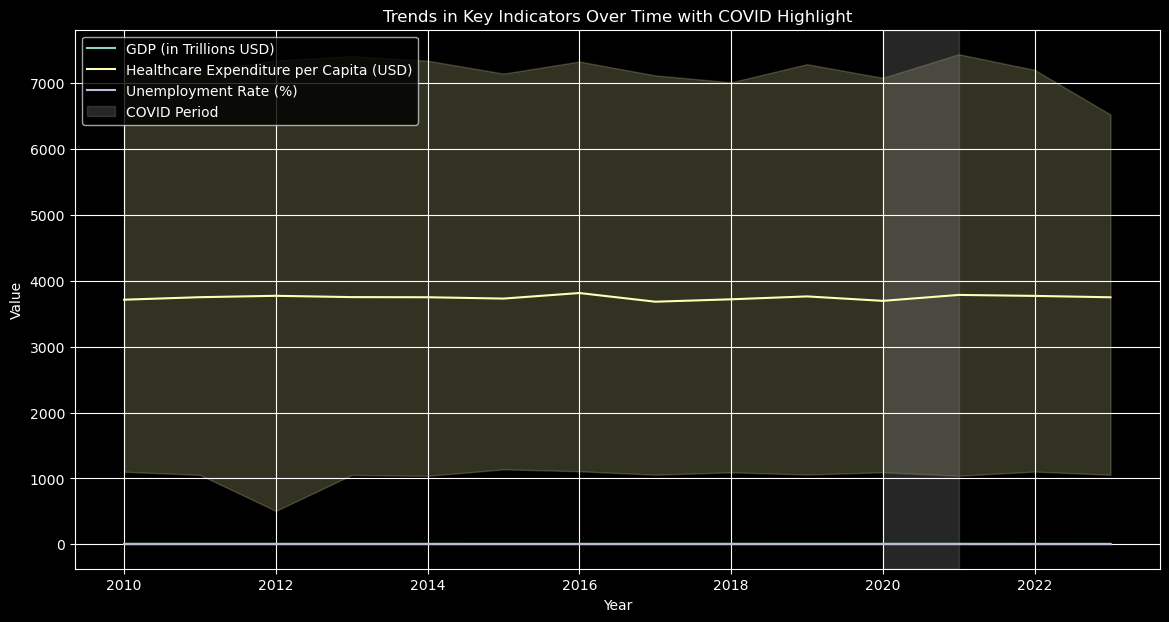

In [60]:
plt.figure(figsize=(14, 7))
for indicator in ['GDP (in Trillions USD)', 'Healthcare Expenditure per Capita (USD)', 'Unemployment Rate (%)']:
    sns.lineplot(data=filtered_df, x='Year', y=indicator, label=indicator)
plt.axvspan(2020, 2021, color='grey', alpha=0.3, label='COVID Period')
plt.legend(loc='upper left')
plt.title('Trends in Key Indicators Over Time with COVID Highlight')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()


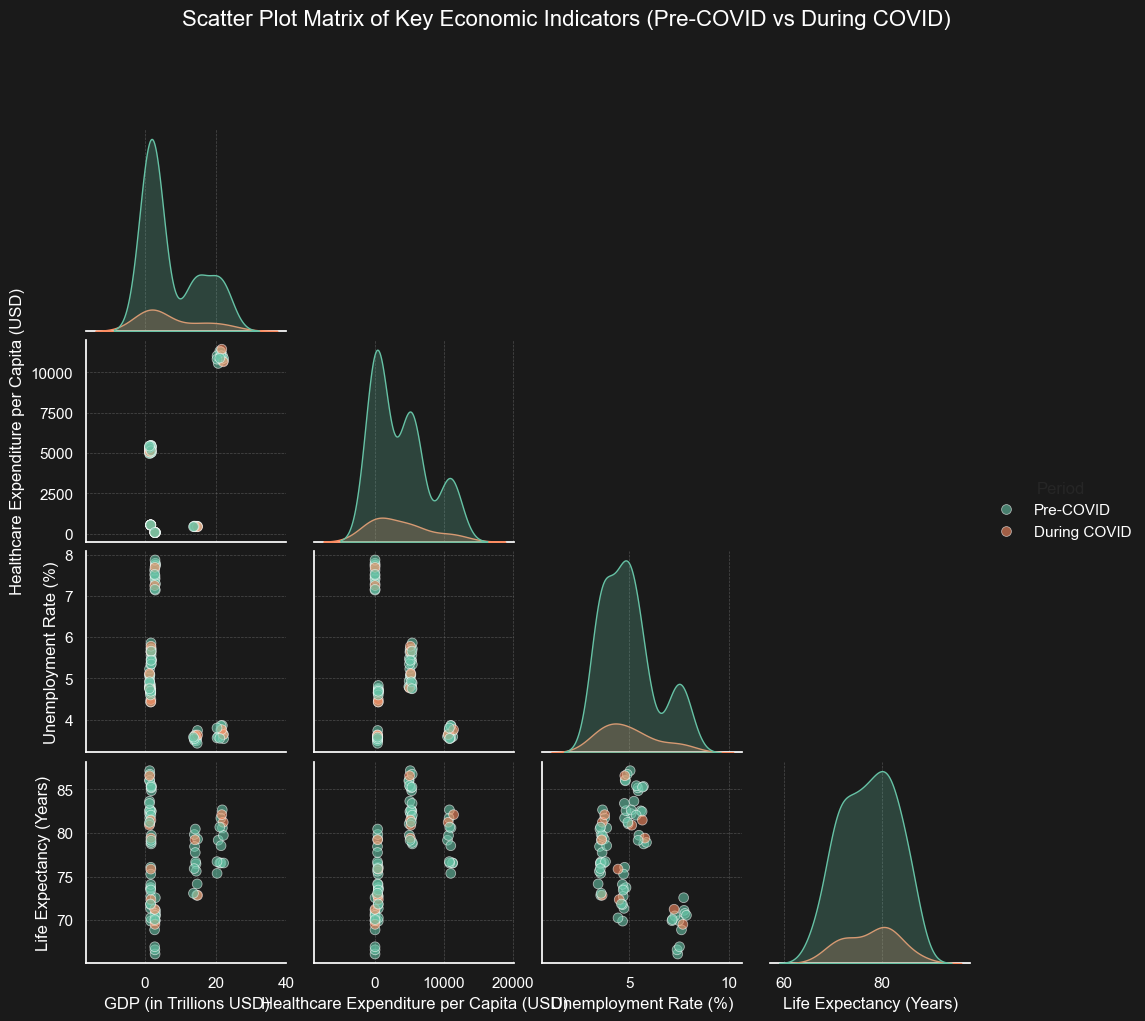

In [93]:
# Set a custom dark theme for background consistency
sns.set_theme(style="darkgrid", rc={"axes.facecolor": "#1a1a1a", "grid.color": "gray"})

# Define your indicators
correlation_indicators = ['GDP (in Trillions USD)', 'Healthcare Expenditure per Capita (USD)', 
                          'Unemployment Rate (%)', 'Life Expectancy (Years)']

# Create the pairplot with the updated settings
pairplot = sns.pairplot(
    filtered_df[correlation_indicators + ['Period']], 
    corner=True, 
    height=2.5, 
    plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'w'},
    diag_kind='kde',
    hue="Period", 
    palette="Set2"
)

# Set a dark background for the whole figure
pairplot.fig.patch.set_facecolor('#1a1a1a')

# Adjust each subplot's background, grid, and text color
for ax in pairplot.axes.flat:
    if ax is not None:
        ax.set_facecolor('#1a1a1a')  # Dark background for each subplot
        ax.tick_params(colors='white')  # White ticks
        ax.xaxis.label.set_color('white')  # White x-axis labels
        ax.yaxis.label.set_color('white')  # White y-axis labels
        ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)  # Gray grid for visibility
        for spine in ax.spines.values():
            spine.set_edgecolor('white')  # White spines/borders

# Ensure the legend text is visible
for text in pairplot._legend.texts:
    text.set_color('white')  # Set legend text color to white
pairplot._legend.set_title("Period")  # Make sure the title is clear

# Update the title for better contrast and add extra spacing if needed
pairplot.fig.suptitle(
    'Scatter Plot Matrix of Key Economic Indicators (Pre-COVID vs During COVID)', 
    y=1.02, fontsize=16, color='white'
)
pairplot.fig.subplots_adjust(top=0.9)  # Adjust spacing for title

# Show plot
plt.show()

In [99]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.io import push_notebook
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20  # or choose another palette with enough colors for your countries

# Enable output in the notebook
output_notebook()

# List of unique countries
countries = filtered_df['Country'].unique()

# If there are more than 20 countries, you may need a larger palette or create a custom color list.
# For simplicity, we'll use Category20, which has 20 colors.
color_palette = Category20[len(countries)] if len(countries) <= 20 else Category20[20]

# Define the color mapper
color_mapper = factor_cmap('country', palette=color_palette, factors=countries)

# Create a ColumnDataSource from your DataFrame
source = ColumnDataSource(data=dict(
    gdp=filtered_df['GDP (in Trillions USD)'],
    life_expectancy=filtered_df['Life Expectancy (Years)'],
    healthcare_expenditure=filtered_df['Healthcare Expenditure per Capita (USD)'],
    country=filtered_df['Country'],
    period=filtered_df['Period']
))

# Initialize the plot with a dark background theme
p = figure(title="GDP vs Life Expectancy with Healthcare Expenditure",
           x_axis_label="GDP (in Trillions USD)", 
           y_axis_label="Life Expectancy (Years)",
           tools="pan,wheel_zoom,box_zoom,reset",
           width=800, height=500)

# Apply dark background and grid settings
p.background_fill_color = "#1a1a1a"
p.border_fill_color = "#1a1a1a"
p.outline_line_color = "#444444"
p.grid.grid_line_color = "#444444"

# Add circle glyphs with color mapped to the country
p.scatter(x='gdp', y='life_expectancy', size=10, source=source,
          color=color_mapper, alpha=0.7, legend_field="country")

# Add hover tool with improved readability on a dark background
hover = HoverTool()
hover.tooltips = [
    ("Country", "@country"),
    ("GDP", "@gdp{0,0.0} Trillions USD"),
    ("Life Expectancy", "@life_expectancy years"),
    ("Healthcare Expenditure", "@healthcare_expenditure{0,0.0} USD per capita"),
    ("Period", "@period")
]
hover.mode = 'mouse'
p.add_tools(hover)

# Customize font color for title and labels to contrast with dark background
p.title.text_color = "white"
p.title.text_font_size = "16pt"
p.xaxis.axis_label_text_color = "white"
p.xaxis.major_label_text_color = "white"
p.yaxis.axis_label_text_color = "white"
p.yaxis.major_label_text_color = "white"

# Adjust legend properties for dark background
p.legend.label_text_color = "white"
p.legend.background_fill_color = "#1a1a1a"
p.legend.border_line_color = None
p.legend.title = "Country"
p.legend.title_text_color = "white"

# Show the plot
show(p, notebook_handle=True)


Loading BokehJS ...

In [101]:
from bokeh.plotting import output_file, save

output_file("interactive_chart.html")
save(p)


'C:\\Users\\jdimi\\OneDrive\\Desktop\\Data Analyist Bootcamp\\Project 3\\Project-3\\interactive_chart.html'